# Data Analysis Project -- Indian Start-up Funding Analysis (2018 - 2021)
#### **General Objective:**
To assess the investment potential and attractiveness of the Indian startup ecosystem and provide recommendations for optimal course of action
#### **Specific Objectives:**

1. Evaluate the trend in the number of startups securing funding annually to determine the growth pattern within the startup ecosystem over the past four years.

2. Assess the average funding size received by startups each year to understand the financial dynamics and investor confidence levels in the startup landscape from 2018 to 2021.

3. Identify the top investors in the startup scene and analyze their investment distribution across different sectors, focusing specifically on the proportion of investments allocated to the top three funded startups within each sector during the specified period.


## Business Questions:
 
 1. How have the trends in funding amounts varied among different sectors of Indian startups from 2018 to 2021, and what implications do these trends have for investors seeking to optimize their investment strategies in the Indian startup ecosystem?
  2. What were the top sectors in the Indian startup ecosystem that received the highest total funding from 2018 to 2021, and what factors contributed to their success in attracting investment compared to other sectors? This question delves into not just the identification of the sectors but also seeks to understand the underlying reasons for their success in attracting funding, which could include factors like market demand, technological innovation, regulatory environment, and investor interest.
   3. What are the specific funding trends across different stages of startup development (early-stage, growth-stage, late-stage) within the Indian startup ecosystem, and how do factors such as sector, geographic location, and investor type influence these trends? This refined question allows for a more comprehensive analysis of funding trends by considering additional dimensions such as: Startup Stages: Early-stage, growth-stage, and late-stage. Sector: Identifying which sectors are receiving funding at various stages. Geographic Location: Understanding regional variations in funding. Investor Type: Examining the role of different types of investors (e.g., venture capital, angel investors, private equity) in funding trends. 
   4. What specific geographic factors (such as infrastructure, talent pool, economic policies, and market access) influence the correlation between the geographical location of startups and the funding they received within the Indian startup ecosystem, and how do these factors vary across different regions? 
   5. What specific factors (such as the amount and stage of funding, investor involvement, business model, and market conditions) influence the relationship between funding amounts and the subsequent success or failure of startups within the Indian ecosystem, and how do these factors vary across different sectors and stages of startup development?
## Hypothesis to Test:
 
Given the goal of assessing the investment potential in the Indian startup ecosystem, we hypothesize that:
 
Null Hypothesis (H0): There is no clear pattern in the funding received by Indian startups from 2018 to 2021, and factors like sector, stage, location, and funding amount do not affect startup success. 
Alternative Hypothesis (H1): There is a clear pattern in the funding received by Indian startups from 2018 to 2021, and factors like sector, stage, location, and funding amount affect startup success.

#### Feature description:
1. Company/Brand: Name of the company/start-up
2. Founded: Year start-up was founded
3. Sector: Sector of service
4. What it does: Description about Company
5. Founders: Founders of the Company
6. Investor: Investors
7. Amount($): Raised fund
8. Stage: Round of funding reached
9. Headquarter - Location of the startups

## Install necessary packages

In [150]:
%pip install pyodbc

Note: you may need to restart the kernel to use updated packages.


In [151]:
%pip install python-dotenv

Note: you may need to restart the kernel to use updated packages.


In [152]:
%pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


In [153]:
%pip install seaborn

In [154]:
#pd.set_option('display.max_columns', None)
#pd.set_option('display.max_rows', None)


 ### Import all the necessary packages
 

In [155]:
import pyodbc     
from dotenv import dotenv_values    #import the dotenv_values function from the dotenv package
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore')


## Load the datasets to use in this project

##### Connect to server for 2020 and 2021 datasets

In [156]:
SERVER="dap-projects-database.database.windows.net"
LOGIN="LP1_learner"
PASSWORD="Hyp0th3s!$T3$t!ng"
DATABASE="dapDB"

In [157]:
# load environment variables from .env file into a dictionary
environment_variables = dotenv_values('.env')
 
# Get the values for the credentials from .env file
database=environment_variables.get("DATABASE")
server=environment_variables.get("SERVER")
login=environment_variables.get("LOGIN")
password=environment_variables.get("PASSWORD")
 
# create a connection string
connection_string=f"DRIVER={{SQL Server}};SERVER={server};DATABASE={database};UID={login};PWD={password}"

In [158]:
connection = pyodbc.connect(connection_string)

In [159]:
# selecting tables from DB
db_query = ''' SELECT *
            FROM INFORMATION_SCHEMA.TABLES
            WHERE TABLE_TYPE = 'BASE TABLE' '''

In [160]:
# call selected table from DataFrame
data1=pd.read_sql(db_query, connection)
 
data1

,TABLE_CATALOG,TABLE_SCHEMA,TABLE_NAME,TABLE_TYPE
0,dapDB,dbo,LP1_startup_funding2021,BASE TABLE
1,dapDB,dbo,LP1_startup_funding2020,BASE TABLE


## Exploring the data
### Data cleaning

In [161]:
query = "select * from dbo.LP1_startup_funding2020"
data20 = pd.read_sql(query, connection)
data20.head()

,Company_Brand,Founded,HeadQuarter,Sector,What_it_does,Founders,Investor,Amount,Stage,column10
0,Aqgromalin,2019.0,Chennai,AgriTech,Cultivating Ideas for Profit,"Prasanna Manogaran, Bharani C L",Angel investors,200000.0,None,None
1,Krayonnz,2019.0,Bangalore,EdTech,An academy-guardian-scholar centric ecosystem ...,"Saurabh Dixit, Gurudutt Upadhyay",GSF Accelerator,100000.0,Pre-seed,None
2,PadCare Labs,2018.0,Pune,Hygiene management,Converting bio-hazardous waste to harmless waste,Ajinkya Dhariya,Venture Center,NaN,Pre-seed,None
3,NCOME,2020.0,New Delhi,Escrow,Escrow-as-a-service platform,Ritesh Tiwari,"Venture Catalysts, PointOne Capital",400000.0,None,None
4,Gramophone,2016.0,Indore,AgriTech,Gramophone is an AgTech platform enabling acce...,"Ashish Rajan Singh, Harshit Gupta, Nishant Mah...","Siana Capital Management, Info Edge",340000.0,None,None


In [162]:
#overview of the descriptive statistics
data20.describe()

,Founded,Amount
count,842.000000,8.010000e+02
mean,2015.363420,1.130430e+08
std,4.097909,2.476635e+09
min,1973.000000,1.270000e+04
25%,2014.000000,1.000000e+06
50%,2016.000000,3.000000e+06
75%,2018.000000,1.100000e+07
max,2020.000000,7.000000e+10


In [163]:
#show information of the data
data20.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1055 entries, 0 to 1054
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Company_Brand  1055 non-null   object 
 1   Founded        842 non-null    float64
 2   HeadQuarter    961 non-null    object 
 3   Sector         1042 non-null   object 
 4   What_it_does   1055 non-null   object 
 5   Founders       1043 non-null   object 
 6   Investor       1017 non-null   object 
 7   Amount         801 non-null    float64
 8   Stage          591 non-null    object 
 9   column10       2 non-null      object 
dtypes: float64(2), object(8)
memory usage: 82.5+ KB


In [164]:
#overview of datatypes
data20.dtypes

Company_Brand     object
Founded          float64
HeadQuarter       object
Sector            object
What_it_does      object
Founders          object
Investor          object
Amount           float64
Stage             object
column10          object
dtype: object

In [165]:
#showing data shape
data20.shape

(1055, 10)

In [166]:
#missing values
data20.isna().sum()

Company_Brand       0
Founded           213
HeadQuarter        94
Sector             13
What_it_does        0
Founders           12
Investor           38
Amount            254
Stage             464
column10         1053
dtype: int64

In [167]:
# replace all dash(-) and empty spaces IN THE Founded column with NaN
data20["Founded"] = data20["Founded"].replace(["-", "", "nan"], np.nan)
data20["Founded"].unique()

array([2019., 2018., 2020., 2016., 2008., 2015., 2017., 2014., 1998.,
       2007., 2011., 1982., 2013., 2009., 2012., 1995., 2010., 2006.,
       1978.,   nan, 1999., 1994., 2005., 1973., 2002., 2004., 2001.])

In [168]:
# Standardize Headquarter  names
data20["HeadQuarter"] = data20["HeadQuarter"].str.replace("Bangalore|Bengaluru", "Bangalore")
data20["HeadQuarter"] = data20["HeadQuarter"].str.replace("Hyderebad", "Hyderabad")
data20["HeadQuarter"] = data20["HeadQuarter"].str.replace("New Delhi|Delhi", "New Delhi")

In [169]:
# Handling missing values
data20["HeadQuarter"] = data20["HeadQuarter"].replace(["", "-", "nan"], np.nan)

In [170]:
# Identify empty, commas, and NaN values in the Founders column
data20[(data20["Founders"] == " ") | (data20["Founders"].str.contains(",")) | (data20["Founders"].isna())| data20["Founders"].isnull()]

,Company_Brand,Founded,HeadQuarter,Sector,What_it_does,Founders,Investor,Amount,Stage,column10
0,Aqgromalin,2019.0,Chennai,AgriTech,Cultivating Ideas for Profit,"Prasanna Manogaran, Bharani C L",Angel investors,200000.0,None,None
1,Krayonnz,2019.0,Bangalore,EdTech,An academy-guardian-scholar centric ecosystem ...,"Saurabh Dixit, Gurudutt Upadhyay",GSF Accelerator,100000.0,Pre-seed,None
4,Gramophone,2016.0,Indore,AgriTech,Gramophone is an AgTech platform enabling acce...,"Ashish Rajan Singh, Harshit Gupta, Nishant Mah...","Siana Capital Management, Info Edge",340000.0,None,None
5,qZense,2019.0,Bangalore,AgriTech,qZense Labs is building the next-generation Io...,"Rubal Chib, Dr Srishti Batra","Venture Catalysts, 9Unicorns Accelerator Fund",600000.0,Seed,None
8,Rupeek,2015.0,Bangalore,FinTech,Rupeek is an online lending platform that spec...,"Amar Prabhu, Ashwin Soni, Sumit Maniyar","KB Investment, Bertelsmann India Investments",45000000.0,Series C,None
...,...,...,...,...,...,...,...,...,...,...
1049,Fashor,2017.0,Chennai,Fashion,Women’s fashion and apparel,"Vikram Kankaria, Priyanka Kankaria",Sprout venture partners,1000000.0,Pre Series A,None
1051,EpiFi,NaN,None,Fintech,It offers customers with a single interface fo...,"Sujith Narayanan, Sumit Gwalani","Sequoia India, Ribbit Capital",13200000.0,Seed Round,None
1052,Purplle,2012.0,Mumbai,Cosmetics,Online makeup and beauty products retailer,"Manish Taneja, Rahul Dash",Verlinvest,8000000.0,None,None
1053,Shuttl,2015.0,New Delhi,Transport,App based bus aggregator serice,"Amit Singh, Deepanshu Malviya",SIG Global India Fund LLP.,8043000.0,Series C,None


In [171]:
# replace() method to replace the specified values (empty string '', comma ,, and NaN np.nan) in the "Founders" column with NaN (np.nan)
data20["Founders"] = data20["Founders"].replace(['', ',', np.nan], np.nan)

In [172]:
#check for null values in the investor column
data20[data20["Investor"].isnull() | (data20["Investor"] == "")|(data20["Investor"] == "nan")]

,Company_Brand,Founded,HeadQuarter,Sector,What_it_does,Founders,Investor,Amount,Stage,column10
21,SucSEED Indovation,2016.0,Hyderabad,FinTech,SucSEED INDOVATION FACILITATES ACCESS TO CAPIT...,Vikrant Varshney,None,5000000.0,None,None
24,Circle of Angels,2018.0,Gurgaon,FinTech,Circles of Angels aims to solve this issue thr...,Karanpal Singh,None,3000000.0,None,None
44,PointOne Capital,2020.0,Bangalore,Venture capitalist,Pre-seed/Seed focussed VC investor,Mihir Jha,None,NaN,None,None
65,Toppeq,2019.0,Mumbai,SaaS startup,SaaS-based equity management platform,Nandini Sankar,None,NaN,Seed,None
131,PlayerzPot,2015.0,Mumbai,Gaming startup,"Favorite fantasy cricket, football & kabaddi l...","Yogesh, Mitesh Gangar",None,3000000.0,Series A,None
151,BlackSoil,2016.0,Mumbai,FinTech,Blacksoil Advisory is an independent boutique ...,Ankur Bansal,None,10000000.0,None,None
162,Jade Forest,NaN,New Delhi,Beverages,NATURALLY THE BEST From zero artificial ingred...,"Punweet Singh, Shuchir Suri",None,250000.0,Seed,None
237,GoodGamer,2020.0,Bangalore,Gaming,GoodGamer is India's first Daily Fantasy Sport...,Charles Creighton,None,2500000.0,Seed,None
241,SoOLEGAL,2015.0,New Delhi,LegalTech,SoOLEGAL is a global integrated directory of l...,Manish Kaul,None,4000000.0,None,None
244,Hire Me Car,NaN,Noida,Car Service,India's largest cloud based digital discovery ...,Pankaj Sharma,None,NaN,Seed,None


In [173]:
# replace () the specified values (empty string '', comma ,, and NaN np.nan) in the Investor column with NaN (np.nan)
data20["Investor"] = data20["Investor"].replace(['', ',', np.nan], np.nan)

In [174]:
#showing unique values in Amount column
data20["Amount"].unique()

array([2.0000000e+05, 1.0000000e+05,           nan, 4.0000000e+05,
       3.4000000e+05, 6.0000000e+05, 4.5000000e+07, 1.0000000e+06,
       2.0000000e+06, 1.2000000e+06, 6.6000000e+08, 1.2000000e+05,
       7.5000000e+06, 5.0000000e+06, 5.0000000e+05, 3.0000000e+06,
       1.0000000e+07, 1.4500000e+08, 1.0000000e+08, 2.1000000e+07,
       4.0000000e+06, 2.0000000e+07, 5.6000000e+05, 2.7500000e+05,
       4.5000000e+06, 1.5000000e+07, 3.9000000e+08, 7.0000000e+06,
       5.1000000e+06, 7.0000000e+08, 2.3000000e+06, 7.0000000e+05,
       1.9000000e+07, 9.0000000e+06, 4.0000000e+07, 7.5000000e+05,
       1.5000000e+06, 7.8000000e+06, 5.0000000e+07, 8.0000000e+07,
       3.0000000e+07, 1.7000000e+06, 2.5000000e+06, 4.0000000e+04,
       3.3000000e+07, 3.5000000e+07, 3.0000000e+05, 2.5000000e+07,
       3.5000000e+06, 2.0000000e+08, 6.0000000e+06, 1.3000000e+06,
       4.1000000e+06, 5.7500000e+05, 8.0000000e+05, 2.8000000e+07,
       1.8000000e+07, 3.2000000e+06, 9.0000000e+05, 2.5000000e

In [175]:
# Ensure the column is of string type
data20["Amount"] = data20["Amount"].astype(str)
# Remove commas
data20["Amount"] = data20["Amount"].str.replace(',', '')
# Replace undisclosed with NaN
data20["Amount"] = data20["Amount"].replace(["Undisclosed", "Undiclsosed"], np.nan)  
# Remove '$' sign
data20["Amount"] = data20["Amount"].str.replace('\$', '')  
# Extract numeric values
data20["Amount"] = data20["Amount"].str.extract('(\d+\.?\d*)', expand=False).astype(float)  

In [176]:
#overview of the stage column
data20["Stage"].unique

<bound method Series.unique of 0             None
1         Pre-seed
2         Pre-seed
3             None
4             None
           ...    
1050          None
1051    Seed Round
1052          None
1053      Series C
1054      Series A
Name: Stage, Length: 1055, dtype: object>

In [177]:
# Replace similar stage names
data20["Stage"] = data20["Stage"].replace({
    'pre series a': 'pre-series a',
    'pre series b': 'pre-series b',
    'pre series c': 'pre-series c',
    'pre seed': 'pre-seed',
    'seed funding': 'seed',
    'seed investment': 'seed',
    'seed round': 'seed',
    'seed a': 'seed',
    'angel round': 'seed',
    'seed round & series a': 'seed',
    'pre seed round': 'pre-seed',
    'pre series a1': 'pre-series a',
    'series a-1': 'series a',
    'series c, d': 'series c',
    'pre-seed round': 'pre-seed',
    'pre series b': 'pre-series b',
    'pre series a': 'pre-series a',
    'seed round': 'seed' })

In [178]:
# Handle missing or unknown values
data20["Stage"] = data20["Stage"].replace([' ', ',', 'nan'], np.nan)

In [179]:
##change dtype for amount column
data20['Amount'] = data20['Amount'].astype(str)

In [180]:
# Remove the $ sign and convert to float, handling non-numeric values
data20['Amount'] = pd.to_numeric(data20['Amount'].str.replace('$', '').str.replace(',', ''), errors='coerce')


In [181]:



# Sector: replace with most repeated
data20['Sector'].fillna(data20['Sector'].mode()[0], inplace=True)

# dealing with missing values in Headquarter column
data20['HeadQuarter'].fillna('HeadQuarter Unknown', inplace=True)

# Impute missing values in 'Investor' with mode
data20['Investor'].fillna(data20['Investor'].mode()[0], inplace=True)

# Amount($): simulate by filling with median of existing amounts
data20['Amount'].fillna(data20['Amount'].mean(), inplace=True)

# Stage: simulate by mode
data20['Stage'].fillna(data20['Stage'].mode()[0], inplace=True)

data20.drop('column10',axis=1,inplace=True)

data20.head()

,Company_Brand,Founded,HeadQuarter,Sector,What_it_does,Founders,Investor,Amount,Stage
0,Aqgromalin,2019.0,Chennai,AgriTech,Cultivating Ideas for Profit,"Prasanna Manogaran, Bharani C L",Angel investors,2.000000e+05,Series A
1,Krayonnz,2019.0,Bangalore,EdTech,An academy-guardian-scholar centric ecosystem ...,"Saurabh Dixit, Gurudutt Upadhyay",GSF Accelerator,1.000000e+05,Pre-seed
2,PadCare Labs,2018.0,Pune,Hygiene management,Converting bio-hazardous waste to harmless waste,Ajinkya Dhariya,Venture Center,1.130430e+08,Pre-seed
3,NCOME,2020.0,New Delhi,Escrow,Escrow-as-a-service platform,Ritesh Tiwari,"Venture Catalysts, PointOne Capital",4.000000e+05,Series A
4,Gramophone,2016.0,Indore,AgriTech,Gramophone is an AgTech platform enabling acce...,"Ashish Rajan Singh, Harshit Gupta, Nishant Mah...","Siana Capital Management, Info Edge",3.400000e+05,Series A


In [182]:
#show missing values
data20.isna().sum()

Company_Brand      0
Founded          213
HeadQuarter        0
Sector             0
What_it_does       0
Founders          12
Investor           0
Amount             0
Stage              0
dtype: int64

In [183]:
#unique in the dataset
data20.nunique()

Company_Brand    905
Founded           26
HeadQuarter       75
Sector           302
What_it_does     990
Founders         927
Investor         848
Amount           301
Stage             42
dtype: int64

In [184]:
# Taking closer look at the duplicates
data20[data20.duplicated(keep=False)].sort_values(by='Sector').head(25)
data20.drop_duplicates(inplace=True)

**working on 2021 data**

In [185]:
query = "select * from dbo.LP1_startup_funding2021"
data21 = pd.read_sql(query, connection)
data21.head()

,Company_Brand,Founded,HeadQuarter,Sector,What_it_does,Founders,Investor,Amount,Stage
0,Unbox Robotics,2019.0,Bangalore,AI startup,Unbox Robotics builds on-demand AI-driven ware...,"Pramod Ghadge, Shahid Memon","BEENEXT, Entrepreneur First","$1,200,000",Pre-series A
1,upGrad,2015.0,Mumbai,EdTech,UpGrad is an online higher education platform.,"Mayank Kumar, Phalgun Kompalli, Ravijot Chugh,...","Unilazer Ventures, IIFL Asset Management","$120,000,000",None
2,Lead School,2012.0,Mumbai,EdTech,LEAD School offers technology based school tra...,"Smita Deorah, Sumeet Mehta","GSV Ventures, Westbridge Capital","$30,000,000",Series D
3,Bizongo,2015.0,Mumbai,B2B E-commerce,Bizongo is a business-to-business online marke...,"Aniket Deb, Ankit Tomar, Sachin Agrawal","CDC Group, IDG Capital","$51,000,000",Series C
4,FypMoney,2021.0,Gurugram,FinTech,"FypMoney is Digital NEO Bank for Teenagers, em...",Kapil Banwari,"Liberatha Kallat, Mukesh Yadav, Dinesh Nagpal","$2,000,000",Seed


In [186]:
#info about the data
data21.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1209 entries, 0 to 1208
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Company_Brand  1209 non-null   object 
 1   Founded        1208 non-null   float64
 2   HeadQuarter    1208 non-null   object 
 3   Sector         1209 non-null   object 
 4   What_it_does   1209 non-null   object 
 5   Founders       1205 non-null   object 
 6   Investor       1147 non-null   object 
 7   Amount         1206 non-null   object 
 8   Stage          781 non-null    object 
dtypes: float64(1), object(8)
memory usage: 85.1+ KB


In [187]:
#descriptive statistics
data21.describe()

,Founded
count,1208.000000
mean,2016.655629
std,4.517364
min,1963.000000
25%,2015.000000
50%,2018.000000
75%,2020.000000
max,2021.000000


In [188]:
#checking for missing values
data21.isna().sum()

Company_Brand      0
Founded            1
HeadQuarter        1
Sector             0
What_it_does       0
Founders           4
Investor          62
Amount             3
Stage            428
dtype: int64

In [189]:
# checking the overview of the Company/Brand column
data21['HeadQuarter'].unique()

array(['Bangalore', 'Mumbai', 'Gurugram', 'New Delhi', 'Hyderabad',
       'Jaipur', 'Ahmadabad', 'Chennai', None,
       'Small Towns, Andhra Pradesh', 'Goa', 'Rajsamand', 'Ranchi',
       'Faridabad, Haryana', 'Gujarat', 'Pune', 'Thane', 'Computer Games',
       'Cochin', 'Noida', 'Chandigarh', 'Gurgaon', 'Vadodara',
       'Food & Beverages', 'Pharmaceuticals\t#REF!', 'Gurugram\t#REF!',
       'Kolkata', 'Ahmedabad', 'Mohali', 'Haryana', 'Indore', 'Powai',
       'Ghaziabad', 'Nagpur', 'West Bengal', 'Patna', 'Samsitpur',
       'Lucknow', 'Telangana', 'Silvassa', 'Thiruvananthapuram',
       'Faridabad', 'Roorkee', 'Ambernath', 'Panchkula', 'Surat',
       'Coimbatore', 'Andheri', 'Mangalore', 'Telugana', 'Bhubaneswar',
       'Kottayam', 'Beijing', 'Panaji', 'Satara', 'Orissia', 'Jodhpur',
       'New York', 'Santra', 'Mountain View, CA', 'Trivandrum',
       'Jharkhand', 'Kanpur', 'Bhilwara', 'Guwahati',
       'Online Media\t#REF!', 'Kochi', 'London',
       'Information Technol

In [190]:
#remove t#REF!from names in headquarters

data21['HeadQuarter'] = data21['HeadQuarter'].replace({'\t#REF!': 'NaN'}, regex=True)
data21['HeadQuarter'].unique()

array(['Bangalore', 'Mumbai', 'Gurugram', 'New Delhi', 'Hyderabad',
       'Jaipur', 'Ahmadabad', 'Chennai', None,
       'Small Towns, Andhra Pradesh', 'Goa', 'Rajsamand', 'Ranchi',
       'Faridabad, Haryana', 'Gujarat', 'Pune', 'Thane', 'Computer Games',
       'Cochin', 'Noida', 'Chandigarh', 'Gurgaon', 'Vadodara',
       'Food & Beverages', 'PharmaceuticalsNaN', 'GurugramNaN', 'Kolkata',
       'Ahmedabad', 'Mohali', 'Haryana', 'Indore', 'Powai', 'Ghaziabad',
       'Nagpur', 'West Bengal', 'Patna', 'Samsitpur', 'Lucknow',
       'Telangana', 'Silvassa', 'Thiruvananthapuram', 'Faridabad',
       'Roorkee', 'Ambernath', 'Panchkula', 'Surat', 'Coimbatore',
       'Andheri', 'Mangalore', 'Telugana', 'Bhubaneswar', 'Kottayam',
       'Beijing', 'Panaji', 'Satara', 'Orissia', 'Jodhpur', 'New York',
       'Santra', 'Mountain View, CA', 'Trivandrum', 'Jharkhand', 'Kanpur',
       'Bhilwara', 'Guwahati', 'Online MediaNaN', 'Kochi', 'London',
       'Information Technology & Services', 'T

In [191]:
# from our unique function, we see that food and beverages, pharmaceuticals and Information Technology & Services
# are in our headquarter column. Lets extract them 

data21[data21['HeadQuarter'].str.contains
     ('Information Technology & Services|Online Media|Pharmaceuticals|Food & Beverages|Computer Games',case=False, na=False)]

,Company_Brand,Founded,HeadQuarter,Sector,What_it_does,Founders,Investor,Amount,Stage
98,FanPlay,2020.0,Computer Games,Computer Games,A real money game app specializing in trivia g...,YC W21,"Pritesh Kumar, Bharat Gupta",Upsparks,$1200000
111,FanPlay,2020.0,Computer Games,Computer Games,A real money game app specializing in trivia g...,YC W21,"Pritesh Kumar, Bharat Gupta",Upsparks,$1200000
241,MasterChow,2020.0,Food & Beverages,Hauz Khas,A ready-to-cook Asian cuisine brand,"Vidur Kataria, Sidhanth Madan",WEH Ventures,$461000,Seed
242,Fullife Healthcare,2009.0,PharmaceuticalsNaN,Primary Business is Development and Manufactur...,Varun Khanna,Morgan Stanley Private Equity Asia,$22000000,Series C,None
255,MasterChow,2020.0,Food & Beverages,Hauz Khas,A ready-to-cook Asian cuisine brand,"Vidur Kataria, Sidhanth Madan",WEH Ventures,$461000,Seed
256,Fullife Healthcare,2009.0,PharmaceuticalsNaN,Primary Business is Development and Manufactur...,Varun Khanna,Morgan Stanley Private Equity Asia,$22000000,Series C,None
1100,Sochcast,2020.0,Online MediaNaN,Sochcast is an Audio experiences company that ...,"CA Harvinderjit Singh Bhatia, Garima Surana, A...","Vinners, Raj Nayak, Amritaanshu Agrawal",$Undisclosed,None,None
1176,Peak,2014.0,Information Technology & Services,"Manchester, Greater Manchester",Peak helps the world's smartest companies put ...,Atul Sharma,SoftBank Vision Fund 2,$75000000,Series C


In [192]:
# replacing with NaN
data21['HeadQuarter'] = data21['HeadQuarter'].replace(['Pharmaceuticals', 'Computer Games', 
    'Food & Beverages', 'Online Media', 'Information Technology & Services'], np.nan)
data21["HeadQuarter"].unique()

array(['Bangalore', 'Mumbai', 'Gurugram', 'New Delhi', 'Hyderabad',
       'Jaipur', 'Ahmadabad', 'Chennai', None,
       'Small Towns, Andhra Pradesh', 'Goa', 'Rajsamand', 'Ranchi',
       'Faridabad, Haryana', 'Gujarat', 'Pune', 'Thane', nan, 'Cochin',
       'Noida', 'Chandigarh', 'Gurgaon', 'Vadodara', 'PharmaceuticalsNaN',
       'GurugramNaN', 'Kolkata', 'Ahmedabad', 'Mohali', 'Haryana',
       'Indore', 'Powai', 'Ghaziabad', 'Nagpur', 'West Bengal', 'Patna',
       'Samsitpur', 'Lucknow', 'Telangana', 'Silvassa',
       'Thiruvananthapuram', 'Faridabad', 'Roorkee', 'Ambernath',
       'Panchkula', 'Surat', 'Coimbatore', 'Andheri', 'Mangalore',
       'Telugana', 'Bhubaneswar', 'Kottayam', 'Beijing', 'Panaji',
       'Satara', 'Orissia', 'Jodhpur', 'New York', 'Santra',
       'Mountain View, CA', 'Trivandrum', 'Jharkhand', 'Kanpur',
       'Bhilwara', 'Guwahati', 'Online MediaNaN', 'Kochi', 'London',
       'The Nilgiris', 'Gandhinagar'], dtype=object)

In [193]:
#replace misspelled stage names with the appropriate stage names 
data21['Stage'] = data21['Stage'].replace({'Seed+':'Seed','Seies A':'Series A'})
data21['Stage'].unique()

array(['Pre-series A', None, 'Series D', 'Series C', 'Seed', 'Series B',
       'Series E', 'Pre-seed', 'Series A', 'Pre-series B', 'Debt',
       '$1200000', 'Bridge', 'Series F2', 'Series A+', 'Series G',
       'Series F', 'Series H', 'Series B3', 'PE', 'Series F1',
       'Pre-series A1', '$300000', 'Early seed', 'Series D1', '$6000000',
       '$1000000', 'Pre-series', 'Series A2', 'Series I'], dtype=object)

In [194]:
#overview of the stage column
data21['Stage'].unique()

array(['Pre-series A', None, 'Series D', 'Series C', 'Seed', 'Series B',
       'Series E', 'Pre-seed', 'Series A', 'Pre-series B', 'Debt',
       '$1200000', 'Bridge', 'Series F2', 'Series A+', 'Series G',
       'Series F', 'Series H', 'Series B3', 'PE', 'Series F1',
       'Pre-series A1', '$300000', 'Early seed', 'Series D1', '$6000000',
       '$1000000', 'Pre-series', 'Series A2', 'Series I'], dtype=object)

In [195]:
# replace NaN using np.nan
data21["Stage"].replace("nan", np.nan, inplace = True, regex=True)
# Extracting the row with  missing data in the NaN column
data21[data21['Stage'].isna()]

,Company_Brand,Founded,HeadQuarter,Sector,What_it_does,Founders,Investor,Amount,Stage
1,upGrad,2015.0,Mumbai,EdTech,UpGrad is an online higher education platform.,"Mayank Kumar, Phalgun Kompalli, Ravijot Chugh,...","Unilazer Ventures, IIFL Asset Management","$120,000,000",None
5,Urban Company,2014.0,New Delhi,Home services,Urban Company (Formerly UrbanClap) is a home a...,"Abhiraj Singh Bhal, Raghav Chandra, Varun Khaitan",Vy Capital,"$188,000,000",None
6,Comofi Medtech,2018.0,Bangalore,HealthTech,Comofi Medtech is a healthcare robotics startup.,Gururaj KB,"CIIE.CO, KIIT-TBI","$200,000",None
8,Vitra.ai,2020.0,Bangalore,Tech Startup,Vitra.ai is an AI-based video translation plat...,Akash Nidhi PS,Inflexor Ventures,Undisclosed,None
9,Taikee,2010.0,Mumbai,E-commerce,"Taikee is the ISO-certified, B2B e-commerce pl...","Nidhi Ramachandran, Sachin Chhabra",None,"$1,000,000",None
...,...,...,...,...,...,...,...,...,...
1172,Peppermint,2019.0,Pune,Industrial Automation,Intelligent Housekeeping Robots for public and...,"Runal Dahiwade, Miraj C Vora","Venture Catalysts, Indian Angel Network",$600000,None
1182,Sugar.fit,2021.0,Bangalore,Health,"Innovative technology, compassionate diabetes ...","Shivtosh Kumar, Madan Somasundaram","Cure.fit, Endiya Partners, Tanglin Venture",$10000000,None
1192,Geniemode,2021.0,Gurugram,B2B,Transforming global sourcing for retailers & s...,"Amit Sharma, Tanuj Gangwani",Info Edge Ventures,$2000000,None
1193,Sapio Analytics,2019.0,Mumbai,Computer Software,Sapio helps government create policies driven ...,"Hardik Somani, Ashwin Srivastava, Shripal Jain...","Rachit Poddar, Rajesh Gupta",$Undisclosed,None


In [196]:
# the Stage contains amounts therefore there is a need to extract the rows with figures 
#in them using the $ sign as our condition . 
data21[data21['Stage'].str.contains('\$', na=False)]

,Company_Brand,Founded,HeadQuarter,Sector,What_it_does,Founders,Investor,Amount,Stage
98,FanPlay,2020.0,NaN,Computer Games,A real money game app specializing in trivia g...,YC W21,"Pritesh Kumar, Bharat Gupta",Upsparks,$1200000
111,FanPlay,2020.0,NaN,Computer Games,A real money game app specializing in trivia g...,YC W21,"Pritesh Kumar, Bharat Gupta",Upsparks,$1200000
538,Little Leap,2020.0,New Delhi,EdTech,Soft Skills that make Smart Leaders,Holistic Development Programs for children in ...,Vishal Gupta,ah! Ventures,$300000
551,BHyve,2020.0,Mumbai,Human Resources,A Future of Work Platform for diffusing Employ...,Backed by 100x.VC,"Omkar Pandharkame, Ketaki Ogale","ITO Angel Network, LetsVenture",$300000
674,MYRE Capital,2020.0,Mumbai,Commercial Real Estate,Democratising Real Estate Ownership,Own rent yielding commercial properties,Aryaman Vir,None,$6000000
677,Saarthi Pedagogy,2015.0,Ahmadabad,EdTech,"India's fastest growing Pedagogy company, serv...",Pedagogy,Sushil Agarwal,"JITO Angel Network, LetsVenture",$1000000


In [197]:
#Remove all amount values with $ sign in the Stage column and put them in the Amount ($) colum
dollar = data21['Stage'].str.contains('\$', na=False)
data21.loc[dollar, ['Stage', 'Amount']] = data21.loc[dollar, ['Amount', 'Stage']].to_numpy()

In [198]:
#check whether the code worked precisely
data21['Stage'].unique()

array(['Pre-series A', None, 'Series D', 'Series C', 'Seed', 'Series B',
       'Series E', 'Pre-seed', 'Series A', 'Pre-series B', 'Debt',
       'Upsparks', 'Bridge', 'Series F2', 'Series A+', 'Series G',
       'Series F', 'Series H', 'Series B3', 'PE', 'Series F1',
       'Pre-series A1', 'ah! Ventures', 'ITO Angel Network, LetsVenture',
       'Early seed', 'Series D1', 'JITO Angel Network, LetsVenture',
       'Pre-series', 'Series A2', 'Series I'], dtype=object)

In [199]:
#replace foreign values with NaN
data21['Stage'] = data21['Stage'].replace(["PE", "ah! Ventures", "ITO Angel Network, LetsVenture",
                     "JITO Angel Network, LetsVenture", "Upsparks"], np.nan)

In [200]:
#overview of the sector column
data21['Sector'].unique()

array(['AI startup', 'EdTech', 'B2B E-commerce', 'FinTech',
       'Home services', 'HealthTech', 'Tech Startup', 'E-commerce',
       'B2B service', 'Helathcare', 'Renewable Energy', 'Electronics',
       'IT startup', 'Food & Beverages', 'Aeorspace', 'Deep Tech',
       'Dating', 'Gaming', 'Robotics', 'Retail', 'Food', 'Oil and Energy',
       'AgriTech', 'Telecommuncation', 'Milk startup', 'AI Chatbot', 'IT',
       'Logistics', 'Hospitality', 'Fashion', 'Marketing',
       'Transportation', 'LegalTech', 'Food delivery', 'Automotive',
       'SaaS startup', 'Fantasy sports', 'Video communication',
       'Social Media', 'Skill development', 'Rental', 'Recruitment',
       'HealthCare', 'Sports', 'Computer Games', 'Consumer Goods',
       'Information Technology', 'Apparel & Fashion',
       'Logistics & Supply Chain', 'Healthtech', 'Healthcare',
       'SportsTech', 'HRTech', 'Wine & Spirits',
       'Mechanical & Industrial Engineering', 'Spiritual',
       'Financial Services', 'I

In [201]:
#overview of the investor column
data21['Investor'].unique()

array(['BEENEXT, Entrepreneur First',
       'Unilazer Ventures, IIFL Asset Management',
       'GSV Ventures, Westbridge Capital', 'CDC Group, IDG Capital',
       'Liberatha Kallat, Mukesh Yadav, Dinesh Nagpal', 'Vy Capital',
       'CIIE.CO, KIIT-TBI', 'Inflection Point Ventures',
       'Inflexor Ventures', None,
       '9Unicorns Accelerator Fund, Metaform Ventures',
       'SucSEED Indovation, IIM Calcutta Innovation Park',
       'Safe Planet Medicare', 'Impact Partners, C4D Partners',
       'Tiger Global Management, InnoVen Capital', 'Novo Tellus Capital',
       'Raintree Family Office, ADB arm',
       'Mumbai Angels, Narendra Shyamsukha', 'Paradigm, Kunal Shah',
       'Matrix Partners India, GIC', 'Chiratae Ventures, JAFCO Asia',
       'Mumbai Angels Network, Expert DOJO', 'GVFL',
       'Kotak Mahindra Bank, FMO', 'Kalaari Capital',
       'NB Ventures, IAN Fund',
       'Sequoia Capital India, Hummingbird Ventures',
       'Gaurav Munjal, Snehil Khanor', 'JITO Angel Net

In [202]:
#remove dollar sign
data21[data21['Investor'].str.contains('\$', na=False)]

,Company_Brand,Founded,HeadQuarter,Sector,What_it_does,Founders,Investor,Amount,Stage
242,Fullife Healthcare,2009.0,PharmaceuticalsNaN,Primary Business is Development and Manufactur...,Varun Khanna,Morgan Stanley Private Equity Asia,$22000000,Series C,None
256,Fullife Healthcare,2009.0,PharmaceuticalsNaN,Primary Business is Development and Manufactur...,Varun Khanna,Morgan Stanley Private Equity Asia,$22000000,Series C,None
257,MoEVing,2021.0,GurugramNaN,MoEVing is India's only Electric Mobility focu...,"Vikash Mishra, Mragank Jain","Anshuman Maheshwary, Dr Srihari Raju Kalidindi",$5000000,Seed,None
545,AdmitKard,2016.0,Noida,EdTech,A tech solution for end to end career advisory...,"Vamsi Krishna, Pulkit Jain, Gaurav Munjal\t#REF!",$1000000,Pre-series A,None
1100,Sochcast,2020.0,Online MediaNaN,Sochcast is an Audio experiences company that ...,"CA Harvinderjit Singh Bhatia, Garima Surana, A...","Vinners, Raj Nayak, Amritaanshu Agrawal",$Undisclosed,None,None


In [203]:
# replace the row with NaN
data21['Investor'] = data21['Investor'].replace(["http://100x.vc/","$Undisclosed", "$1000000", "$5000000", "$22000000", "2000000", ], np.nan)
data21['Investor'].unique()

array(['BEENEXT, Entrepreneur First',
       'Unilazer Ventures, IIFL Asset Management',
       'GSV Ventures, Westbridge Capital', 'CDC Group, IDG Capital',
       'Liberatha Kallat, Mukesh Yadav, Dinesh Nagpal', 'Vy Capital',
       'CIIE.CO, KIIT-TBI', 'Inflection Point Ventures',
       'Inflexor Ventures', None,
       '9Unicorns Accelerator Fund, Metaform Ventures',
       'SucSEED Indovation, IIM Calcutta Innovation Park',
       'Safe Planet Medicare', 'Impact Partners, C4D Partners',
       'Tiger Global Management, InnoVen Capital', 'Novo Tellus Capital',
       'Raintree Family Office, ADB arm',
       'Mumbai Angels, Narendra Shyamsukha', 'Paradigm, Kunal Shah',
       'Matrix Partners India, GIC', 'Chiratae Ventures, JAFCO Asia',
       'Mumbai Angels Network, Expert DOJO', 'GVFL',
       'Kotak Mahindra Bank, FMO', 'Kalaari Capital',
       'NB Ventures, IAN Fund',
       'Sequoia Capital India, Hummingbird Ventures',
       'Gaurav Munjal, Snehil Khanor', 'JITO Angel Net

In [204]:
#overview of the Amount column
data21['Amount'].unique()

array(['$1,200,000', '$120,000,000', '$30,000,000', '$51,000,000',
       '$2,000,000', '$188,000,000', '$200,000', 'Undisclosed',
       '$1,000,000', '$3,000,000', '$100,000', '$700,000', '$9,000,000',
       '$40,000,000', '$49,000,000', '$400,000', '$300,000',
       '$25,000,000', '$160,000,000', '$150,000', '$1,800,000',
       '$5,000,000', '$850,000', '$53,000,000', '$500,000', '$1,100,000',
       '$6,000,000', '$800,000', '$10,000,000', '$21,000,000',
       '$7,500,000', '$26,000,000', '$7,400,000', '$1,500,000',
       '$600,000', '$800,000,000', '$17,000,000', '$3,500,000',
       '$15,000,000', '$215,000,000', '$2,500,000', '$350,000,000',
       '$5,500,000', '$83,000,000', '$110,000,000', '$500,000,000',
       '$65,000,000', '$150,000,000,000', '$300,000,000', '$2,200,000',
       '$35,000,000', '$140,000,000', '$4,000,000', '$13,000,000', None,
       '$Undisclosed', '$2000000', '$800000', '$6000000', '$2500000',
       '$9500000', '$13000000', '$5000000', '$8000000',

In [205]:

# Remove the $ sign and convert to float, handling non-numeric values
data21['Amount'] = pd.to_numeric(data21['Amount'].str.replace('$', '').str.replace(',', ''), errors='coerce')
data21['Amount'].head()

0      1200000.0
1    120000000.0
2     30000000.0
3     51000000.0
4      2000000.0
Name: Amount, dtype: float64

In [206]:
#descriptive statistics
data21.describe()

,Founded,Amount
count,1208.000000,1.062000e+03
mean,2016.655629,1.693252e+08
std,4.517364,4.602719e+09
min,1963.000000,1.000000e+04
25%,2015.000000,1.000000e+06
50%,2018.000000,3.500000e+06
75%,2020.000000,1.500000e+07
max,2021.000000,1.500000e+11


In [207]:
#locating some rows in certain columns
data21.loc[data21["Amount"] == "JITO Angel Network, LetsVenture", ["Amount", "Stage"]] = ["$1000000", np.nan]
data21.loc[data21["Company_Brand"] == "Saarthi Pedagogy"]

,Company_Brand,Founded,HeadQuarter,Sector,What_it_does,Founders,Investor,Amount,Stage
677,Saarthi Pedagogy,2015.0,Ahmadabad,EdTech,"India's fastest growing Pedagogy company, serv...",Pedagogy,Sushil Agarwal,1000000.0,NaN


In [208]:
#locating other columns with some peculiar rows
data21.loc[data21["Company_Brand"] == "MoEVing", ["Amount", "Stage", "Investor"]] = ["$5000000", "Seed", np.nan]
data21.loc[data21["Company_Brand"] == "Godamwale", ["Amount", "Stage", "Investor"]] = ["1000000", "Seed", np.nan]
data21.loc[data21["Company_Brand"] == "MoEVing"]

,Company_Brand,Founded,HeadQuarter,Sector,What_it_does,Founders,Investor,Amount,Stage
257,MoEVing,2021.0,GurugramNaN,MoEVing is India's only Electric Mobility focu...,"Vikash Mishra, Mragank Jain","Anshuman Maheshwary, Dr Srihari Raju Kalidindi",NaN,$5000000,Seed


In [209]:
#row location
data21.loc[data21["Company_Brand"] == "Godamwale"]

,Company_Brand,Founded,HeadQuarter,Sector,What_it_does,Founders,Investor,Amount,Stage
1148,Godamwale,2016.0,Mumbai,Logistics & Supply Chain,Godamwale is tech enabled integrated logistics...,"Basant Kumar, Vivek Tiwari, Ranbir Nandan",NaN,1000000,Seed


In [210]:
#row location
data21.loc[data21["Company_Brand"] == "Fullife Healthcare", ["HeadQuarter","Amount", "Stage", "Investor"]] = [np.nan, "$22000000000", "Series C", np.nan]
data21.loc[data21["Company_Brand"] == "Fullife Healthcare"]

,Company_Brand,Founded,HeadQuarter,Sector,What_it_does,Founders,Investor,Amount,Stage
242,Fullife Healthcare,2009.0,NaN,Primary Business is Development and Manufactur...,Varun Khanna,Morgan Stanley Private Equity Asia,NaN,$22000000000,Series C
256,Fullife Healthcare,2009.0,NaN,Primary Business is Development and Manufactur...,Varun Khanna,Morgan Stanley Private Equity Asia,NaN,$22000000000,Series C


In [211]:


# dealing with missing values in Headquarter column
data21['HeadQuarter'].fillna('HeadQuarter Unknown', inplace=True)

# Impute missing values in 'Investor' with mode
data21['Investor'].fillna(data21['Investor'].mode()[0], inplace=True)

# Replace empty column with 0
data21["Amount"].replace(" ", 0, inplace = True, regex=True)
# remove comma from the amounts 
data21["Amount"].replace(",", "", inplace = True, regex=True)
# Replace  "Undisclosed", "undisclosed", "Undiclsosed", "Undislosed" and "$undisclosed" with NaN
data21["Amount"].replace("Undisclosed", np.nan, inplace = True, regex=True)
data21["Amount"].replace("undisclosed", np.nan, inplace = True, regex=True)
data21["Amount"].replace("Undiclsosed", np.nan, inplace = True, regex=True)
data21["Amount"].replace("Undislosed", np.nan, inplace = True, regex=True)
data21["Amount"].replace("$undisclosed", np.nan, inplace = True, regex=True)

# Stage: simulate by mode
data21['Stage'].fillna(data21['Stage'].mode()[0], inplace=True)


data21.head()

,Company_Brand,Founded,HeadQuarter,Sector,What_it_does,Founders,Investor,Amount,Stage
0,Unbox Robotics,2019.0,Bangalore,AI startup,Unbox Robotics builds on-demand AI-driven ware...,"Pramod Ghadge, Shahid Memon","BEENEXT, Entrepreneur First",1200000.0,Pre-series A
1,upGrad,2015.0,Mumbai,EdTech,UpGrad is an online higher education platform.,"Mayank Kumar, Phalgun Kompalli, Ravijot Chugh,...","Unilazer Ventures, IIFL Asset Management",120000000.0,Seed
2,Lead School,2012.0,Mumbai,EdTech,LEAD School offers technology based school tra...,"Smita Deorah, Sumeet Mehta","GSV Ventures, Westbridge Capital",30000000.0,Series D
3,Bizongo,2015.0,Mumbai,B2B E-commerce,Bizongo is a business-to-business online marke...,"Aniket Deb, Ankit Tomar, Sachin Agrawal","CDC Group, IDG Capital",51000000.0,Series C
4,FypMoney,2021.0,Gurugram,FinTech,"FypMoney is Digital NEO Bank for Teenagers, em...",Kapil Banwari,"Liberatha Kallat, Mukesh Yadav, Dinesh Nagpal",2000000.0,Seed


In [212]:
# Convert the 'Amount' column to string
data21["Amount"] = data21["Amount"].apply(str)

# Remove the "$" and Replace specific patterns with NaN values in the 'Amount($)' Column
data21["Amount"] = data21["Amount"].apply(lambda x: str(x).replace("$",""))
data21["Amount"].replace("^\s*$", np.nan, inplace=True, regex=True)

In [213]:
#checking for missing values
data21.isna().sum()

Company_Brand    0
Founded          1
HeadQuarter      0
Sector           0
What_it_does     0
Founders         4
Investor         0
Amount           0
Stage            0
dtype: int64

In [214]:
# Conform the changes made on the unique vlaues in the column
data21['Amount'].unique()

array(['1200000.0', '120000000.0', '30000000.0', '51000000.0',
       '2000000.0', '188000000.0', '200000.0', 'nan', '1000000.0',
       '3000000.0', '100000.0', '700000.0', '9000000.0', '40000000.0',
       '49000000.0', '400000.0', '300000.0', '25000000.0', '160000000.0',
       '150000.0', '1800000.0', '5000000.0', '850000.0', '53000000.0',
       '500000.0', '1100000.0', '6000000.0', '800000.0', '10000000.0',
       '21000000.0', '7500000.0', '26000000.0', '7400000.0', '1500000.0',
       '600000.0', '800000000.0', '17000000.0', '3500000.0', '15000000.0',
       '215000000.0', '2500000.0', '350000000.0', '5500000.0',
       '83000000.0', '110000000.0', '500000000.0', '65000000.0',
       '150000000000.0', '300000000.0', '2200000.0', '35000000.0',
       '140000000.0', '4000000.0', '13000000.0', '9500000.0', '8000000.0',
       '12000000.0', '1700000.0', '150000000.0', '100000000.0',
       '225000000.0', '6700000.0', '1300000.0', '20000000.0', '250000.0',
       '52000000.0', '3800

In [215]:
# Taking closer look at the duplicates
data21[data21.duplicated(keep=False)].sort_values(by='Sector').head(25)
data21.drop_duplicates(inplace=True)

**Working on 2018 Dataset**

In [216]:
data18 =pd.read_csv("startup_funding2018.csv")
data18.head()

,Company Name,Industry,Round/Series,Amount,Location,About Company
0,TheCollegeFever,"Brand Marketing, Event Promotion, Marketing, S...",Seed,250000,"Bangalore, Karnataka, India","TheCollegeFever is a hub for fun, fiesta and f..."
1,Happy Cow Dairy,"Agriculture, Farming",Seed,"₹40,000,000","Mumbai, Maharashtra, India",A startup which aggregates milk from dairy far...
2,MyLoanCare,"Credit, Financial Services, Lending, Marketplace",Series A,"₹65,000,000","Gurgaon, Haryana, India",Leading Online Loans Marketplace in India
3,PayMe India,"Financial Services, FinTech",Angel,2000000,"Noida, Uttar Pradesh, India",PayMe India is an innovative FinTech organizat...
4,Eunimart,"E-Commerce Platforms, Retail, SaaS",Seed,—,"Hyderabad, Andhra Pradesh, India",Eunimart is a one stop solution for merchants ...


In [217]:
#over view of the data info
data18.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 526 entries, 0 to 525
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Company Name   526 non-null    object
 1   Industry       526 non-null    object
 2   Round/Series   526 non-null    object
 3   Amount         526 non-null    object
 4   Location       526 non-null    object
 5   About Company  526 non-null    object
dtypes: object(6)
memory usage: 24.8+ KB


In [218]:
#shape of the data
data18.shape

(526, 6)

In [219]:
#show data types
data18.dtypes

Company Name     object
Industry         object
Round/Series     object
Amount           object
Location         object
About Company    object
dtype: object

In [220]:
#descriptive statistics
data18.describe().T

,count,unique,top,freq
Company Name,526,525,TheCollegeFever,2
Industry,526,405,—,30
Round/Series,526,21,Seed,280
Amount,526,198,—,148
Location,526,50,"Bangalore, Karnataka, India",102
About Company,526,524,"TheCollegeFever is a hub for fun, fiesta and f...",2


In [221]:
#checking for missing values 
data18.isna().sum()

Company Name     0
Industry         0
Round/Series     0
Amount           0
Location         0
About Company    0
dtype: int64

In [222]:
# Find the missing values depictict _
data18[data18['Industry']=='—']

,Company Name,Industry,Round/Series,Amount,Location,About Company
58,MissMalini Entertainment,—,Seed,"₹104,000,000","Mumbai, Maharashtra, India",MissMalini Entertainment is a multi-platform n...
105,Jagaran Microfin,—,Debt Financing,"₹550,000,000","Kolkata, West Bengal, India",Jagaran Microfin is a Microfinance institution...
121,FLEECA,—,Seed,—,"Jaipur, Rajasthan, India",FLEECA is a Tyre Care Provider company.
146,WheelsEMI,—,Series B,"$14,000,000","Pune, Maharashtra, India","WheelsEMI is the brand name of NBFC, WheelsEMI..."
153,Fric Bergen,—,Venture - Series Unknown,—,"Alwar, Rajasthan, India",Fric Bergen is a leader in the specialty food ...
174,Deftouch,—,Seed,—,"Bangalore, Karnataka, India",Deftouch is a mobile game development company ...
181,Corefactors,—,Seed,—,"Bangalore, Karnataka, India","Corefactors is a leading campaign management, ..."
210,Cell Propulsion,—,Seed,"₹7,000,000","Bangalore, Karnataka, India",Cell Propulsion is an electric mobility startu...
230,Flathalt,—,Angel,50000,"Gurgaon, Haryana, India",FInd your Customized Home here.
235,dishq,—,Seed,400000,"Bengaluru, Karnataka, India",dishq leverages food science and machine learn...


In [223]:
# Replace Dashes(-) in all columns with NaN
data18 =data18.replace('—',np.nan)

In [224]:
#overview of the industry column
data18['Industry'].unique

<bound method Series.unique of 0      Brand Marketing, Event Promotion, Marketing, S...
1                                   Agriculture, Farming
2       Credit, Financial Services, Lending, Marketplace
3                            Financial Services, FinTech
4                     E-Commerce Platforms, Retail, SaaS
                             ...                        
521     B2B, Business Development, Internet, Marketplace
522                                      Tourism, Travel
523           Food and Beverage, Food Delivery, Internet
524                               Information Technology
525           Biotechnology, Health Care, Pharmaceutical
Name: Industry, Length: 526, dtype: object>

In [225]:
#mostly the overview column has the entries with more than one industry, keep the first
data18['Industry'] = data18['Industry'].str.split(',').str[0]
data18['Industry'] 

0             Brand Marketing
1                 Agriculture
2                      Credit
3          Financial Services
4        E-Commerce Platforms
                ...          
521                       B2B
522                   Tourism
523         Food and Beverage
524    Information Technology
525             Biotechnology
Name: Industry, Length: 526, dtype: object

In [226]:
# Check for unique values
data18['Round/Series'].unique()

array(['Seed', 'Series A', 'Angel', 'Series B', 'Pre-Seed',
       'Private Equity', 'Venture - Series Unknown', 'Grant',
       'Debt Financing', 'Post-IPO Debt', 'Series H', 'Series C',
       'Series E', 'Corporate Round', 'Undisclosed',
       'https://docs.google.com/spreadsheets/d/1x9ziNeaz6auNChIHnMI8U6kS7knTr3byy_YBGfQaoUA/edit#gid=1861303593',
       'Series D', 'Secondary Market', 'Post-IPO Equity',
       'Non-equity Assistance', 'Funding Round'], dtype=object)

In [227]:
# Drop the row that has google docs link
data18 = data18[data18['Round/Series'] != 'https://docs.google.com/spreadsheets/d/1x9ziNeaz6auNChIHnMI8U6kS7knTr3byy_YBGfQaoUA/edit#gid=1861303593']

# Reset the row index
data18.reset_index(drop=True, inplace=True)

In [228]:
#data shape
data18.shape

(525, 6)

In [229]:
#change data type
data18['Amount'] = data18['Amount'].astype(str)



In [230]:
# Create separate dataframe for rupee amounts
df_rupees = data18[data18['Amount'].astype(str).str.contains('₹')]
# convert rupees to dollars
df_rupees['Amount'] = df_rupees['Amount'].apply(lambda x: x.replace('₹','').replace(',','')).astype('float')
df_rupees['Amount'] = df_rupees['Amount']*0.0146

# update the original dataframe
data18.loc[data18['Amount'].isin(df_rupees['Amount'])] = df_rupees

In [231]:
# Convert the 'Amount' column to string
data18["Amount"] = data18["Amount"].apply(str)

# Remove the "$" and Replace specific patterns with NaN values in the 'Amount($)' Column
data18["Amount"] = data18["Amount"].apply(lambda x: str(x).replace("$",""))
data18["Amount"].replace("^\s*$", np.nan, inplace=True, regex=True)

In [232]:
# Ensure the column is of string type
data18["Amount"] = data18["Amount"].astype(str)
# Remove dollar sign
data18['Amount'] = data18['Amount'].str.replace('₹', '')
# Replace commas
data18['Amount'] = data18['Amount'].str.replace(',','')
data18['Amount'] = data18['Amount'].astype(float)

In [233]:
# Replace all the NaN values with the mean 
data18['Amount'].replace(to_replace = np.nan, value = data18['Amount'].mean(), inplace = True)

In [234]:
# overview of the location column
data18['Location'].unique

<bound method Series.unique of 0           Bangalore, Karnataka, India
1            Mumbai, Maharashtra, India
2               Gurgaon, Haryana, India
3           Noida, Uttar Pradesh, India
4      Hyderabad, Andhra Pradesh, India
                     ...               
520         Bangalore, Karnataka, India
521             Haryana, Haryana, India
522          Mumbai, Maharashtra, India
523          Mumbai, Maharashtra, India
524          Chennai, Tamil Nadu, India
Name: Location, Length: 525, dtype: object>

In [235]:
#strip the location column to only show the city info
data18['Location'] = data18['Location'].str.split(',').str[0]
data18.head()

,Company Name,Industry,Round/Series,Amount,Location,About Company
0,TheCollegeFever,Brand Marketing,Seed,2.500000e+05,Bangalore,"TheCollegeFever is a hub for fun, fiesta and f..."
1,Happy Cow Dairy,Agriculture,Seed,4.000000e+07,Mumbai,A startup which aggregates milk from dairy far...
2,MyLoanCare,Credit,Series A,6.500000e+07,Gurgaon,Leading Online Loans Marketplace in India
3,PayMe India,Financial Services,Angel,2.000000e+06,Noida,PayMe India is an innovative FinTech organizat...
4,Eunimart,E-Commerce Platforms,Seed,2.397974e+08,Hyderabad,Eunimart is a one stop solution for merchants ...


In [236]:
# Replace Bengaluru with Bangalore

data18['Location'].replace('Bengaluru', 'Bangalore', inplace=True)
data18['Location'].replace('New Delhi', 'Delhi', inplace=True)

In [237]:
# missing values
data18.isnull().sum()

Company Name      0
Industry         30
Round/Series      0
Amount            0
Location          0
About Company     0
dtype: int64

In [238]:
# Taking closer look at the duplicates
data18[data18.duplicated(keep=False)].sort_values(by='About Company').head()
data18.drop_duplicates(inplace=True)

In [239]:
# check for unique values in stage column
data18["Location"].unique()

array(['Bangalore', 'Mumbai', 'Gurgaon', 'Noida', 'Hyderabad', 'Kalkaji',
       'Delhi', 'India', 'Hubli', 'Chennai', 'Mohali', 'Kolkata', 'Pune',
       'Jodhpur', 'Kanpur', 'Ahmedabad', 'Azadpur', 'Haryana', 'Cochin',
       'Faridabad', 'Jaipur', 'Kota', 'Anand', 'Bangalore City',
       'Belgaum', 'Thane', 'Margão', 'Indore', 'Alwar', 'Kannur',
       'Trivandrum', 'Ernakulam', 'Kormangala', 'Uttar Pradesh',
       'Andheri', 'Mylapore', 'Ghaziabad', 'Kochi', 'Powai', 'Guntur',
       'Kalpakkam', 'Bhopal', 'Coimbatore', 'Worli', 'Alleppey',
       'Chandigarh', 'Guindy', 'Lucknow'], dtype=object)

In [240]:
#Overview of the Stage column
data18['Round/Series'].unique()

array(['Seed', 'Series A', 'Angel', 'Series B', 'Pre-Seed',
       'Private Equity', 'Venture - Series Unknown', 'Grant',
       'Debt Financing', 'Post-IPO Debt', 'Series H', 'Series C',
       'Series E', 'Corporate Round', 'Undisclosed', 'Series D',
       'Secondary Market', 'Post-IPO Equity', 'Non-equity Assistance',
       'Funding Round'], dtype=object)

In [241]:
# replace NaN using np.nan
data18["Round/Series"].replace("nan", np.nan, inplace = True, regex=True)
# Extracting the row with  missing data in the NaN column
data18[data18['Round/Series'].isna()]

,Company Name,Industry,Round/Series,Amount,Location,About Company
99,Portea Medical,Health Care,NaN,250000000.0,Bangalore,Portea Medical is the largest and fastest grow...
105,Jagaran Microfin,NaN,NaN,550000000.0,Kolkata,Jagaran Microfin is a Microfinance institution...
114,OneAssist,Financial Services,NaN,2400000.0,Mumbai,OneAssist is a protection & assistance service...
149,Quikr,Classifieds,NaN,550000000.0,Bangalore,Quikr is a free classifieds and online marketp...
359,Drivezy,Automotive,NaN,100000000.0,Bangalore,Drivezy is India's largest vehicle sharing pla...
375,Aye Finance,Finance,NaN,72000000.0,Gurgaon,Aye Finance provides financial services to mic...
383,Yaantra,Information Services,NaN,2000000.0,Delhi,"Yaantra, India’s leading mobile phone repair, ..."
394,Dunzo,Customer Service,NaN,70000000.0,Bangalore,Dunzo is an app that connects you with the nea...
422,Shuttl,Apps,NaN,1000000.0,Gurgaon,Shuttl provides an app-based office shuttle se...
451,Vogo Rentals,Last Mile Transportation,NaN,80000000.0,Kormangala,Vogo is a dockless scooter rental company in I...


In [242]:
# Stage: simulate by mode
data18['Round/Series'].fillna(data18['Round/Series'].mode()[0], inplace=True)


In [243]:
# sector simulated by mode
data18['Industry'].fillna(data18['Industry'].mode()[0], inplace=True)

**Working with 2019 data set**

In [244]:
data19 = pd.read_csv("startup_funding2019.csv")
data19.head()

,Company/Brand,Founded,HeadQuarter,Sector,What it does,Founders,Investor,Amount($),Stage
0,Bombay Shaving,NaN,NaN,Ecommerce,Provides a range of male grooming products,Shantanu Deshpande,Sixth Sense Ventures,"$6,300,000",NaN
1,Ruangguru,2014.0,Mumbai,Edtech,A learning platform that provides topic-based ...,"Adamas Belva Syah Devara, Iman Usman.",General Atlantic,"$150,000,000",Series C
2,Eduisfun,NaN,Mumbai,Edtech,It aims to make learning fun via games.,Jatin Solanki,"Deepak Parekh, Amitabh Bachchan, Piyush Pandey","$28,000,000",Fresh funding
3,HomeLane,2014.0,Chennai,Interior design,Provides interior designing solutions,"Srikanth Iyer, Rama Harinath","Evolvence India Fund (EIF), Pidilite Group, FJ...","$30,000,000",Series D
4,Nu Genes,2004.0,Telangana,AgriTech,"It is a seed company engaged in production, pr...",Narayana Reddy Punyala,Innovation in Food and Agriculture (IFA),"$6,000,000",NaN


In [245]:
#descriptive statistics
data19.describe().T

,count,mean,std,min,25%,50%,75%,max
Founded,60.0,2014.533333,2.937003,2004.0,2013.0,2015.0,2016.25,2019.0


In [246]:
#info about the data
data19.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89 entries, 0 to 88
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Company/Brand  89 non-null     object 
 1   Founded        60 non-null     float64
 2   HeadQuarter    70 non-null     object 
 3   Sector         84 non-null     object 
 4   What it does   89 non-null     object 
 5   Founders       86 non-null     object 
 6   Investor       89 non-null     object 
 7   Amount($)      89 non-null     object 
 8   Stage          43 non-null     object 
dtypes: float64(1), object(8)
memory usage: 6.4+ KB


In [247]:
#data types
data19.dtypes

Company/Brand     object
Founded          float64
HeadQuarter       object
Sector            object
What it does      object
Founders          object
Investor          object
Amount($)         object
Stage             object
dtype: object

In [248]:
#shape of the 2019 dataset
data19.shape

(89, 9)

In [249]:
#checking for missing values
data19.isnull().sum()

Company/Brand     0
Founded          29
HeadQuarter      19
Sector            5
What it does      0
Founders          3
Investor          0
Amount($)         0
Stage            46
dtype: int64

In [250]:
#overview of the founded column
data19['Founded'].unique

<bound method Series.unique of 0        NaN
1     2014.0
2        NaN
3     2014.0
4     2004.0
       ...  
84       NaN
85    2013.0
86    2016.0
87    2015.0
88       NaN
Name: Founded, Length: 89, dtype: float64>

In [251]:
# replace NaN using np.nan

data19["Founded"].replace("nan", np.nan, inplace = True, regex=True)

#Change the datatype of Founded column from Float to int first to remove the decimal
# fill NaN rows with 0
data19['Founded'] = data19['Founded'].replace(np.nan, 0)
data19['Founded'] = data19['Founded'].astype(int)
data19['Founded']

0        0
1     2014
2        0
3     2014
4     2004
      ... 
84       0
85    2013
86    2016
87    2015
88       0
Name: Founded, Length: 89, dtype: int32

In [252]:
#overview of the Headquarter column
# New Dehli == in Dehli 

data19['HeadQuarter'].replace('New Delhi', 'Delhi', inplace=True)
data19[data19['HeadQuarter']=='New Delhi'].sum()

Company/Brand    0.0
Founded          0.0
HeadQuarter      0.0
Sector           0.0
What it does     0.0
Founders         0.0
Investor         0.0
Amount($)        0.0
Stage            0.0
dtype: float64

In [253]:
# Remove the $ sign and convert to float, handling non-numeric values
data19['Amount($)'] = pd.to_numeric(data19['Amount($)'].str.replace('$', '').str.replace(',', ''), errors='coerce')


In [254]:
#change data type
data19['Amount($)'] = data19['Amount($)'].astype(str)
# Replace commas
data19['Amount($)'] = data19['Amount($)'].str.replace(',','')

In [255]:
# Amount column contains some other values that need to be changed before converting to float
data19['Amount($)'] = data19['Amount($)'].str.replace('Undisclosed','')
data19['Amount($)'] = data19['Amount($)'].replace('',np.nan)
# Change dtype to float
data19['Amount($)'] = data19['Amount($)'].astype(float)

In [256]:

# Sector: replace with most repeated
data19['Sector'].fillna(data19['Sector'].mode()[0], inplace=True)

# dealing with missing values in Headquarter column
data19['HeadQuarter'].fillna('HeadQuarter Unknown', inplace=True)

# Stage: simulate by mode
data19['Stage'].fillna(data19['Stage'].mode()[0], inplace=True)

In [257]:
# Replace all the NaN values with the mean 
data19['Amount($)'].replace(to_replace = np.nan, value = data19['Amount($)'].mean(), inplace = True)

In [258]:
# Taking closer look at the duplicates
data19[data19.duplicated(keep=False)].sort_values(by='Sector').head(25)
data19.drop_duplicates(inplace=True)

**EXPLORATORY DATA ANALYSIS**

***Univariate Analysis***

#### Print Column Names for Comparison

In [259]:
# Print column names for comparison
print("Column names in data_2018:")
print(data18.columns)
print("\n")

# Column names for data_2019
print("Column names in data_2019:")
print(data19.columns)
print("\n")

# Column names for data_2020
print("Column names in data_2020:")
print(data20.columns)
print("\n")

# Column names for data_2021
print("Column names in data_2021:")
print(data21.columns)
print("\n")

Column names in data_2018:
Index(['Company Name', 'Industry', 'Round/Series', 'Amount', 'Location',
       'About Company'],
      dtype='object')


Column names in data_2019:
Index(['Company/Brand', 'Founded', 'HeadQuarter', 'Sector', 'What it does',
       'Founders', 'Investor', 'Amount($)', 'Stage'],
      dtype='object')


Column names in data_2020:
Index(['Company_Brand', 'Founded', 'HeadQuarter', 'Sector', 'What_it_does',
       'Founders', 'Investor', 'Amount', 'Stage'],
      dtype='object')


Column names in data_2021:
Index(['Company_Brand', 'Founded', 'HeadQuarter', 'Sector', 'What_it_does',
       'Founders', 'Investor', 'Amount', 'Stage'],
      dtype='object')




In [260]:
# Define a common schema for renaming
common_schema = {
    'Company_Brand': 'Company',
    'Company Name': 'Company',
    'Company/Brand': 'Company',
    'Founded': 'Founded',
    'HeadQuarter': 'Headquarter',
    'HeadQuarter': 'Headquarter',
    'Sector': 'Sector',
    'Industry': 'Sector',
    'What_it_does': 'Description',
    'What it does': 'Description',
    'About Company': 'Description',
    'Founders': 'Founders',
    'Investor': 'Investor',
    'Amount': 'Amount',
    'Amount($)': 'Amount',
    'Stage': 'Stage',
    'Round/Series': 'Stage',
    'Location': 'Headquarter',
    
}
data20['fundyear'] = 2020
data21['fundyear'] = 2021
data18['fundyear'] =2018
data19['fundyear'] =2019


# Rename columns in each dataset
data20.rename(columns=common_schema, inplace=True)
data21.rename(columns=common_schema, inplace=True)
data18.rename(columns=common_schema, inplace=True)
data19.rename(columns=common_schema, inplace=True)

# Concatenate datasets
df = pd.concat([data20, data21, data18, data19], ignore_index=True)

# Display the result
df.head()


,Company,Founded,Headquarter,Sector,Description,Founders,Investor,Amount,Stage,fundyear
0,Aqgromalin,2019.0,Chennai,AgriTech,Cultivating Ideas for Profit,"Prasanna Manogaran, Bharani C L",Angel investors,200000.0,Series A,2020
1,Krayonnz,2019.0,Bangalore,EdTech,An academy-guardian-scholar centric ecosystem ...,"Saurabh Dixit, Gurudutt Upadhyay",GSF Accelerator,100000.0,Pre-seed,2020
2,PadCare Labs,2018.0,Pune,Hygiene management,Converting bio-hazardous waste to harmless waste,Ajinkya Dhariya,Venture Center,113042969.543071,Pre-seed,2020
3,NCOME,2020.0,New Delhi,Escrow,Escrow-as-a-service platform,Ritesh Tiwari,"Venture Catalysts, PointOne Capital",400000.0,Series A,2020
4,Gramophone,2016.0,Indore,AgriTech,Gramophone is an AgTech platform enabling acce...,"Ashish Rajan Singh, Harshit Gupta, Nishant Mah...","Siana Capital Management, Info Edge",340000.0,Series A,2020


In [261]:
#checking for values in the amount column
df["Amount"].value_counts

<bound method IndexOpsMixin.value_counts of 0               200000.0
1               100000.0
2       113042969.543071
3               400000.0
4               340000.0
              ...       
2849          20000000.0
2850         693000000.0
2851           5000000.0
2852          50000000.0
2853          33000000.0
Name: Amount, Length: 2854, dtype: object>

In [262]:
#checking for datatypes 
df.dtypes

Company         object
Founded        float64
Headquarter     object
Sector          object
Description     object
Founders        object
Investor        object
Amount          object
Stage           object
fundyear         int64
dtype: object

In [263]:
#checking for unique values in the dataset
df.nunique()

Company        2213
Founded          35
Headquarter     136
Sector          594
Description    2690
Founders       1980
Investor       1770
Amount          596
Stage            66
fundyear          4
dtype: int64

In [264]:
#fix spaces and column names
df.columns= df.columns.str.strip()
df.columns

Index(['Company', 'Founded', 'Headquarter', 'Sector', 'Description',
       'Founders', 'Investor', 'Amount', 'Stage', 'fundyear'],
      dtype='object')

In [265]:
# Standardize the sector names by converting them to title case
df["Sector"] = df["Sector"].str.title()
df['Sector'].unique()

array(['Agritech', 'Edtech', 'Hygiene Management', 'Escrow',
       'Networking Platform', 'Fintech', 'Crowdsourcing',
       'Food & Bevarages', 'Healthtech', 'Fashion Startup',
       'Food Industry', 'Food Delivery', 'Virtual Auditing Startup',
       'E-Commerce', 'Gaming', 'Work Fulfillment', 'Ai Startup',
       'Telecommunication', 'Logistics', 'Tech Startup', 'Sports',
       'Retail', 'Medtech', 'Tyre Management', 'Cloud Company',
       'Software Company', 'Venture Capitalist', 'Renewable Player',
       'Iot Startup', 'Saas Startup', 'Aero Company', 'Marketing Company',
       'Retail Startup', 'Co-Working Startup', 'Finance Company',
       'Tech Company', 'Solar Monitoring Company',
       'Video Sharing Platform', 'Gaming Startup',
       'Video Streaming Platform', 'Consumer Appliances',
       'Blockchain Startup', 'Conversational Ai Platform', 'Real Estate',
       'Saas Platform', 'Ai Platform', 'Fusion Beverages', 'Hr Tech',
       'Job Portal', 'Hospitality', 'Digit

In [266]:
# Loop to get the values in the unique values in the Industry column

# Loop to get the values in the unique values in the Industry column

sector_name_list = df['Sector'].tolist()

unique_sectors = []
for Sector in sector_name_list:
    if Sector not in unique_sectors:
        unique_sectors.append(Sector)


        
for Sector in unique_sectors:
    print(Sector)

Agritech
Edtech
Hygiene Management
Escrow
Networking Platform
Fintech
Crowdsourcing
Food & Bevarages
Healthtech
Fashion Startup
Food Industry
Food Delivery
Virtual Auditing Startup
E-Commerce
Gaming
Work Fulfillment
Ai Startup
Telecommunication
Logistics
Tech Startup
Sports
Retail
Medtech
Tyre Management
Cloud Company
Software Company
Venture Capitalist
Renewable Player
Iot Startup
Saas Startup
Aero Company
Marketing Company
Retail Startup
Co-Working Startup
Finance Company
Tech Company
Solar Monitoring Company
Video Sharing Platform
Gaming Startup
Video Streaming Platform
Consumer Appliances
Blockchain Startup
Conversational Ai Platform
Real Estate
Saas Platform
Ai Platform
Fusion Beverages
Hr Tech
Job Portal
Hospitality
Digital Media
Dairy Startup
Content Management
Spacetech
Transportation
Trading Platform
Ai Company
Photonics Startup
Entertainment
Cosmetics
Scanning App
Skincare Startup
Food And Beverages
Biotechnology Company
Foodtech
Proptech
Cleantech
Fitness Startup
Healthcare


In [267]:
# Mapping dictionary for sector cleaning
sector_mapping = {
    'FinTech': ['FinTech', 'fintech', 'Financial Technology', 'Fintech'],
    'EdTech': ['EdTech', 'Edtech', 'Education Technology'],
    'E-commerce': ['E-commerce', 'Ecommerce', 'ecommerce', 'e-commerce'],
    'AI': ['AI', 'Artificial Intelligence', 'artificial intelligence'],
    'Health': ['Health', 'healthcare', 'Health Care', 'healthtech', 'Healthcare'],
    'Food & Beverage': ['Food & Beverage', 'Foodtech', 'Food and Beverages', 'Food Industry', 'Food devlivery', ' Food Delivery' 'Food & tech', 'Foodtech & Logistics', 'Food & Nutrition', 'Food & Bevarages'],
    'Automotive': ['Automotive', 'Automobile', 'Automobiles', 'Automobile Technology', 'automotive tech'],
    'Logistics': ['Logistics', 'logistics', 'Transport & Rentals', 'Transport', 'Logitech', 'Transportation', 'logistics & Supply Chain'],
    'Fashion': ['Fashion', 'Fashion startup', 'Fashion Tech', 'Fashion and lifestyle', 'Fashion & Lifestyle', 'Fashion & Lifestyle', 'Fashion & Lifestyle', 'Fashion & Lifestyle', 'Fashion & Lifestyle', 'FMCG', 'Fashion & Lifestyle', 'Fashion & Lifestyle', 'fashion and lifestyle', 'fashion & lifestyle', 'Fashion & Lifestyle'],
    'CleanTech': ['CleanTech', 'Cleantech', 'Renewables & Environment', 'Clean Energy', 'Pollution control equiptment', 'Renewable player', 'Clean energy', 'Renewable Energy'],
    'Real Estate': ['Real Estate', 'Real estate', 'Commercial Real Estate', 'Housing', 'Housing Marketplace', 'Housing & Rentals', 'housing & Rentals'],
    'Tech': ['Tech', 'technology', 'Technology', 'Techonology', 'Tech company', 'tech startup', 'IT', 'IT company'],
    'SaaS': ['SaaS', 'Saas', 'SaaS startup', 'SaaS platform'],
    'Retail': ['Retail', 'Retail Tech', 'Retail startup', 'Retail Aggregator'],
    'Marketing': ['Marketing', 'marketing', 'Marketing company', 'Marketing & Customer loyalty', 'MarTech'],
    'Blockchain': ['Blockchain', 'Cryptocurrency', 'blockchain'],
    'Social Media': ['Social Media', 'Social network', 'social media', 'Social e-commerce', 'Social Network'],
    'Entertainment': ['Entertainment', 'Digital Entertainment', 'media', 'Media', 'Online Media', 'Media Tech'],
    'Travel': ['Travel', 'TravelTech', 'Tourism', 'Tourism & EV', 'Travel tech'],
    'Finance': ['Finance', 'Financial Services', 'Finance company', 'Financial Technology', 'financial services', 'Financial Exchanges', 'financial technology', 'Venture capitalist', 'Venture capital', 'Venture Capital', 'Capital Markets', 'Investment Management', 'Investment', 'investment', 'Investment Banking', 'investment Management', 'Investment', 'Impact Investing', 'impact investing', 'FinTech & Financial Services', 'FinTech'],
    'E-learning': ['E-learning', 'E-Learning', 'EdtTech', 'EdTech', 'EdTech Startup', 'Education', 'education', 'Higher Education', 'continuing education', 'Education Management', 'Education Technology', 'Educational'],
    'AI & Tech': ['AI & Tech', 'AI and tech'],
    'Security': ['Security', 'Cybersecurity', 'Network Security'],
    'Insurance': ['Insurance', 'Insurance technology', 'insurtech', 'Insurance Tech', 'Health Insurance', 'Life Insurance', 'Property Insurance', 'insurance tech'],
    'HR': ['HR', 'HR Tech', 'HRTech', 'Human Resources', 'hrtech'],
    'Beauty': ['Beauty', 'beauty', 'Beauty & wellness', 'Beauty & Personal Care', 'Beauty & Personal Care'],
    'Agriculture': ['Agriculture', 'AgriTech', 'Agri tech', 'Agri tech', 'Agri tech', 'Agri tech', 'Agriculture Tech', 'AgriTech', 'AgTech', 'Agri tech'],
    'Energy': ['Energy', 'Solar', 'Clean Energy', 'Energy Storage', 'Solar solution', 'Renewable Energy', 'Energy Management', 'Energy', 'Natural Resources', 'electricity', 'Solar Monitoring Company', 'solar', 'Renewable Energy', 'solar'],
    'Mobility': ['Mobility', 'MoEVing', 'Mobility tech', 'Mobility/Transport', 'Mobility & Transport', 'Mobility & Technology', 'Mobility Services', 'Mobility', 'Mobility & EV', 'Mobility & EV', 'Mobility & EV', 'Mobility', 'Mobility', 'Mobility & Tech', 'Mobility'],
    'Manufacturing': ['Manufacturing', 'Manufacturing startup', 'Manufacturing startup', 'manufacturing', 'Manufacturing startup'],
    'D2C': ['D2C', 'D2C Business', 'D2C Fashion', 'D2C jewellery'],
    'Data Science': ['Data Science', 'Data Analytics', 'data science', 'data analytics'],
    'Telecommunications': ['Telecommunications', 'Telecommunication'],
    'Pharmaceutical': ['Pharmaceutical', 'pharmaceutical']
}

# Function to map sector values
def new_cat(sector):
    for key, values in sector_mapping.items():
        if sector in values:
            return key
    return sector  # Return original value if not found



In [268]:
# Apply function to Sector column for new categorization 
df['Sector'] = df['Sector'].apply(new_cat)
df['Sector'].nunique()

503

In [269]:
#drop the description column has no value to the dataset
df.drop(columns='Description', axis=1,inplace = True)
df.columns

Index(['Company', 'Founded', 'Headquarter', 'Sector', 'Founders', 'Investor',
       'Amount', 'Stage', 'fundyear'],
      dtype='object')

In [270]:
#check for missing values
df.isna().sum()

Company          0
Founded        738
Headquarter      0
Sector           0
Founders       543
Investor       524
Amount           0
Stage            0
fundyear         0
dtype: int64

#### Currency conversions
### Exchage Rate Source:OFX

In [271]:
# Provided exchange rates between 2018 - 2021
exchange_rates = {
    2018: 0.014649,
    2019: 0.014209,
    2020: 0.013501,
    2021: 0.013527
}

# Calculate the average exchange rate
average_exchange_rate = sum(exchange_rates.values()) / len(exchange_rates)

# Print the average exchange rate
print(f'Average exchange rate: {average_exchange_rate:.4f}')


Average exchange rate: 0.0140


In [272]:
# Define the exchange rate
exchange_rate = 0.0140

# Replace '—' in amount with np.nan
df['Amount'].replace('—', np.nan, inplace=True)

# Replace 'None' with np.nan
df['Amount'].replace('None', np.nan, inplace=True)

# Convert amount to string type
df['Amount'] = df['Amount'].astype(str)

# Remove dollar symbol and commas, then convert to float
df['Amount'] = df['Amount'].str.replace('$', '', regex=False)
df['Amount'] = df['Amount'].str.replace(',', '', regex=False)

# Convert Rupee values to USD and remove the rupee symbol
df['Amount'] = df['Amount'].apply(
    lambda x: float(x.replace('₹', '')) * exchange_rate if isinstance(x, str) and '₹' in x else x
)

# Convert funding_amount to float type
df['Amount'] = pd.to_numeric(df['Amount'], errors='coerce')


In [273]:
'''Drop column irrelevant to analytical question'''

# Drop the "Founded" and "Founders" columns from merged_data
df.drop(columns=['Founded', 'Founders'], inplace=True)

In [274]:
# Impute missing values in 'Investor' with mode
df['Investor'].fillna(df['Investor'].mode()[0], inplace=True)


In [275]:
#check for data types
df.dtypes

Company         object
Headquarter     object
Sector          object
Investor        object
Amount         float64
Stage           object
fundyear         int64
dtype: object

In [276]:
#check for missing values
df.isna().sum()

Company          0
Headquarter      0
Sector           0
Investor         0
Amount         142
Stage            0
fundyear         0
dtype: int64

In [277]:
# Replace all the NaN values with the mean 
df['Amount'].replace(to_replace = np.nan, value = df['Amount'].mean(), inplace = True)

In [278]:
df.isna().sum()

Company        0
Headquarter    0
Sector         0
Investor       0
Amount         0
Stage          0
fundyear       0
dtype: int64

In [279]:
# descriptive statistics
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Amount,2854.0,1.659220e+08,3.165112e+09,7500.0,1300000.0,7000000.0,104750000.0,1.500000e+11
fundyear,2854.0,2.020018e+03,1.087328e+00,2018.0,2020.0,2020.0,2021.0,2.021000e+03


**saving the cleaned data into a csv file**

In [280]:
#save into csv file
df.to_csv("India_funding_cleaned.csv", index=False)



***Bivariate Analysis***

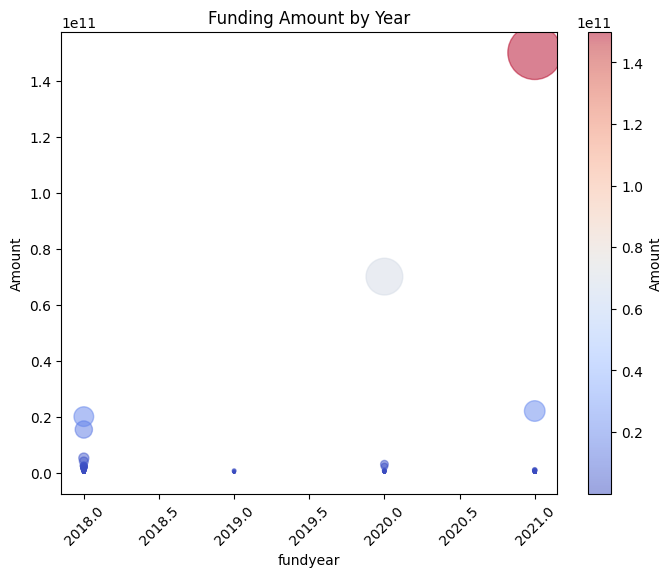

In [281]:
# Convert 'Funding Year' to string
fundyear = df['fundyear'].astype('float')
amount = df['Amount']
plt.figure(figsize=(8, 6))

# Create a scatter plot with color
scatter = plt.scatter(fundyear, amount, s=amount/100000000, c=amount, cmap='coolwarm', alpha=0.5)

# Add colorbar
colorbar = plt.colorbar(scatter)
colorbar.set_label('Amount')

# Customize the plot
plt.title('Funding Amount by Year')
plt.xlabel('fundyear')
plt.ylabel('Amount')
plt.xticks(rotation=45)

# Display the plot
plt.show()

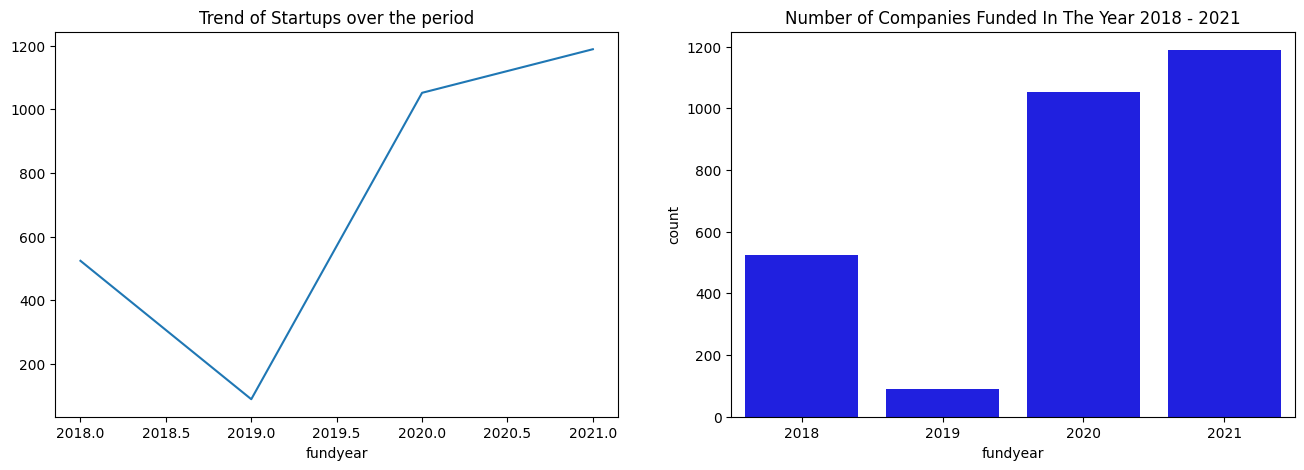

In [282]:
# plot a line gragh to show the trend of startup with the period 2018 - 2021

base_color = 'blue'
plt.figure(figsize=(16, 5))
plt.subplot(1, 2, 1)
funding_year_count = df.groupby(['fundyear'])['Company'].count()
funding_year_count.plot();
plt.title('Trend of Startups over the period')


# plot a bar chart to show the number of startups within each year
plt.subplot(1, 2, 2)
sns.countplot(
    x='fundyear',  
    data=df, 
    color=base_color)

plt.title('Number of Companies Funded In The Year 2018 - 2021')
plt.show()

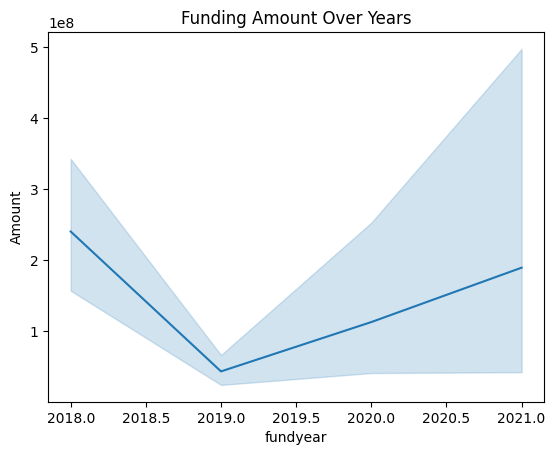

In [283]:
sns.lineplot(data=df, x='fundyear', y='Amount')
plt.title('Funding Amount Over Years')
plt.show()

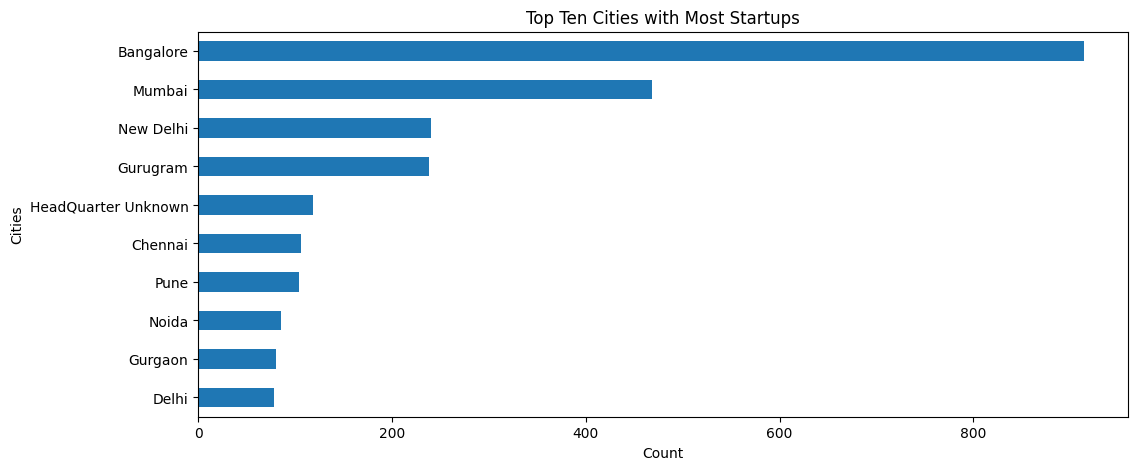

In [284]:
# count the number of startups in each city
top_ten_loc = df['Headquarter'].value_counts().head(10).sort_values()

# plot a horinzontal bar chart to show the number of startups in each city
plt.figure(figsize=(12, 5))
top_ten_loc.plot(kind='barh')
plt.title('Top Ten Cities with Most Startups')
plt.xlabel('Count')
plt.ylabel('Cities');

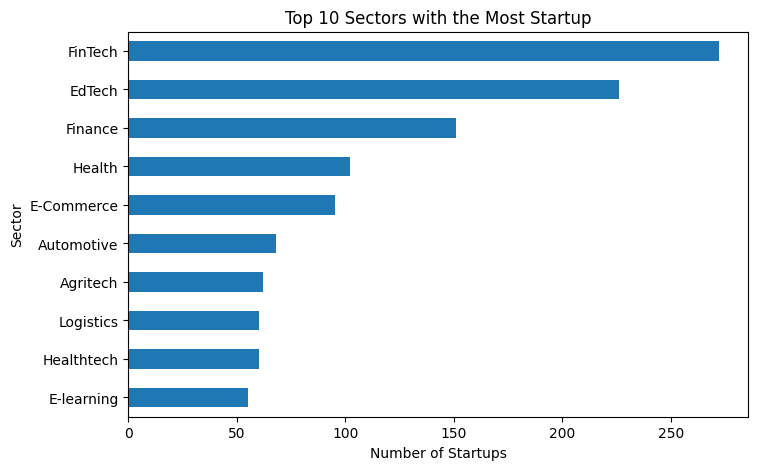

In [285]:
# check the top 10 cities with the most startups
Top_ten_sectors = df['Sector'].value_counts().head(10)

# plot a bar chart to show the top 10 sectors with the most number of startups
plt.figure(figsize=(8, 5))
Top_ten_sectors.sort_values().plot(kind='barh')
plt.title('Top 10 Sectors with the Most Startup')
plt.xlabel('Number of Startups')
plt.ylabel('Sector');

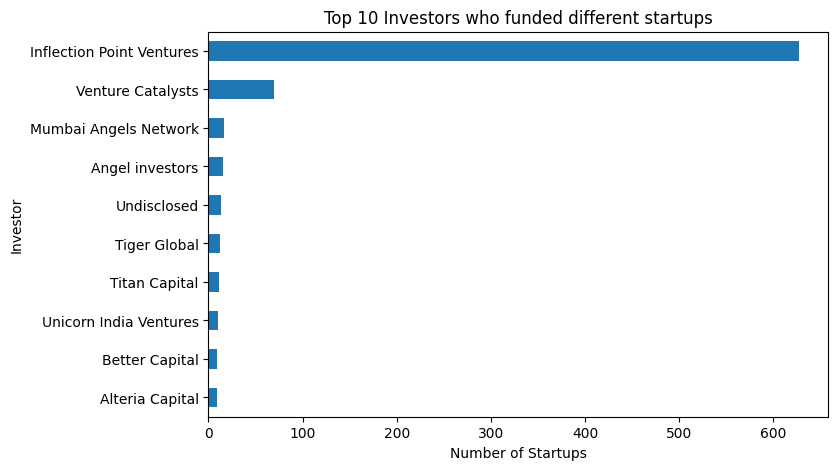

In [286]:
Top_10_investors_ = df['Investor'].value_counts().head(10)

# plot a bar chart to show the top 10 investors with the most number of startups
plt.figure(figsize=(8, 5))
Top_10_investors_.sort_values().plot(kind='barh')
plt.title('Top 10 Investors who funded different startups')
plt.xlabel('Number of Startups')
plt.ylabel('Investor');

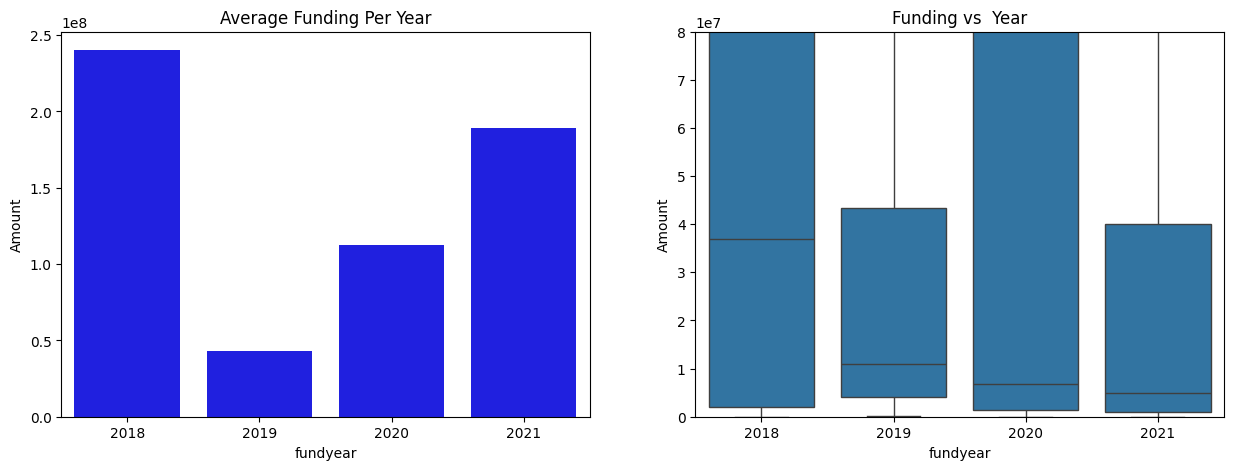

In [287]:
# get the average(mean) funding yearly
average_funding_year= df.groupby(['fundyear']).agg({'Amount': 'mean'})
average_funding_year.reset_index(inplace=True)

# print the average funding yearly
# plot a bar chart to show the avearge funding yearly
plt.figure(figsize=(15,  5))
plt.subplot(1, 2, 1)
sns.barplot(
    data=average_funding_year,
    x='fundyear',
    y='Amount',
    color=base_color)
plt.title('Average Funding Per Year')

# plot a box plot to show the avearge funding yearly
plt.subplot(1, 2, 2)
sns.boxplot(data=df, y='Amount', x='fundyear')
plt.title('Funding vs  Year');
plt.ylim(-10,80000000);

**HYPOTHESIS TESTING**

**Null Hypothesis (H0):**
There is no significant difference in the average funding amounts received across different sectors within the Indian startup ecosystem from 2018 to 2021.

**Alternative Hypothesis (H1):**
There is a significant difference in the average funding amounts received across different sectors within the Indian startup ecosystem from 2018 to 2021.

In [288]:
import scipy.stats as stats

# Extract funding amounts for each sector
sector_funding = [df[df['Sector'] == Sector]['Amount'] for Sector in df['Sector'].unique()]

# Perform one-way ANOVA
f_statistic, p_value = stats.f_oneway(*sector_funding)

alpha = 0.05

# Print the results
print("F-Statistic:", f_statistic)
print("P-Value:", p_value)

# Check for significance
if p_value < alpha:
    print("Reject Null Hypothesis. There is a significant difference in average funding amounts across sectors.")
else:
    print("Fail to reject Null Hypothesis. There is no significant difference in average funding amounts across sectors.")


F-Statistic: 0.15684692911205064
P-Value: 0.9999999999999999
Fail to reject Null Hypothesis. There is no significant difference in average funding amounts across sectors.


**ANALYTICAL QUESTIONS**

1. *Analyze the growth trajectory of startups over the past four years from 2018 to 2021. Investigate if there is an increase in the number of startups being funded and the average size companies of funded annually.*

Text(0.5, 1.0, 'Size of Companies Funded In The Year 2018 - 2021')

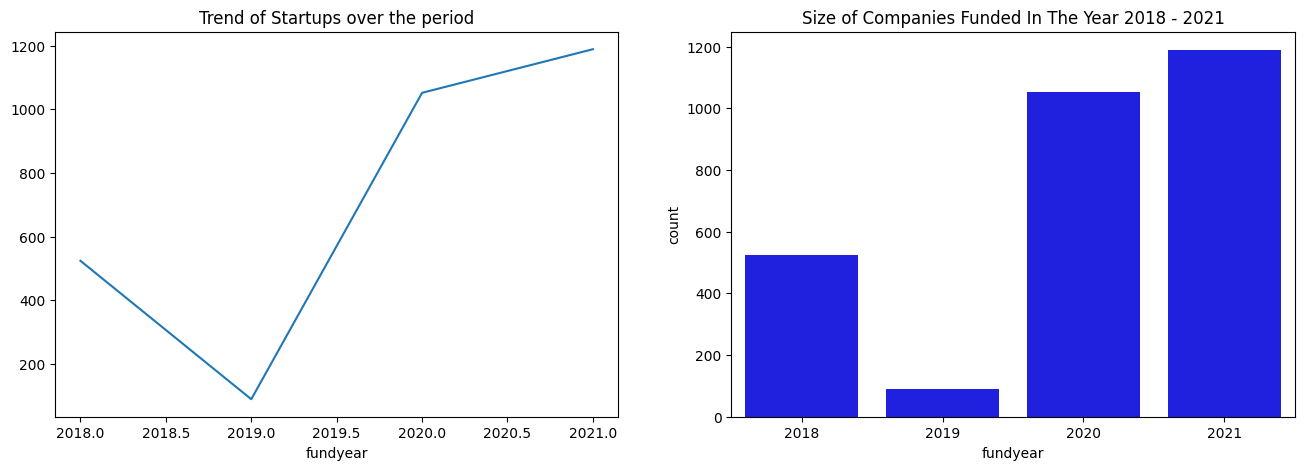

In [289]:
# plot a line gragh to show the trend of startup with the period 2018 - 2021

base_color = 'blue'
plt.figure(figsize=(16, 5))
plt.subplot(1, 2, 1)
funding_year_count = df.groupby(['fundyear'])['Company'].count()
funding_year_count.plot();
plt.title('Trend of Startups over the period')


# plot a bar chart to show the number of startups within each year
plt.subplot(1, 2, 2)
sns.countplot(
    x='fundyear',  
    data=df, 
    color=base_color)

plt.title('Size of Companies Funded In The Year 2018 - 2021')

In [290]:
# count the number of startup in each Funding Year
df['fundyear'].value_counts()


2021    1189
2020    1052
2018     524
2019      89
Name: fundyear, dtype: int64

Observation 

Over the span of four years from 2018 to 2021, the data reflects a notable increase in the number of startups receiving funding. however, the notable dip in the number of startups funded in 2019, with only 89 startups receiving funding, may have been influenced by various real factors such as economic uncertainty associated with the outbreak of COVID-19 pandemic. That not withstanding, there is an indication economic rebound per the trend after 2019 which suggest suggests resilience and potential for growth in the startup ecosystem.

2. *Investigate the financial landscape for Indian startups over the four years. Has the average funding amount increased, indicating growing investor confidence, or has it plateaued or decreased overtime?* 

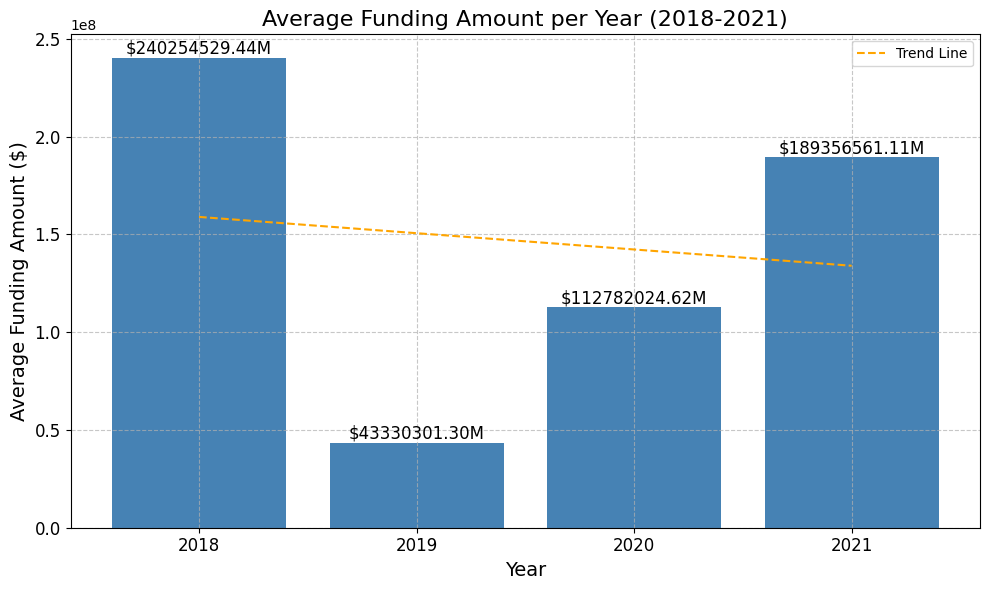

In [291]:
from scipy.stats import linregress

# Filter data for the years 2018 to 2021
filtered_data = df[(df['fundyear'] >= 2018) & (df['fundyear'] <= 2021)]

# Group data by year and calculate the average funding amount for each year
average_funding_per_year = filtered_data.groupby('fundyear')['Amount'].mean()

# Plotting
plt.figure(figsize=(10, 6))
bars = plt.bar(average_funding_per_year.index, average_funding_per_year.values, color='steelblue')

# Fit a linear regression line to the data points
slope, intercept, _, _, _ = linregress(average_funding_per_year.index, average_funding_per_year.values)
trend_line = slope * average_funding_per_year.index + intercept

# Plot the trend line
plt.plot(average_funding_per_year.index, trend_line, color='orange', linestyle='--', label='Trend Line')

# Add labels and title
plt.title('Average Funding Amount per Year (2018-2021)', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Average Funding Amount ($)', fontsize=14)
plt.xticks(average_funding_per_year.index, fontsize=12)
plt.yticks(fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)

# Add values on top of each bar with a slight offset for better visibility
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height + 0.5, "${:.2f}M".format(height), ha='center', va='bottom', fontsize=12)

# Add legend
plt.legend()

plt.tight_layout()
plt.show()

Observation

Over the four-year period from 2018 to 2021, the financial landscape for Indian startups has seen remarkable growth, the growth was high in 2018 but serged in 2019 due to effects of COVID 19 effects. then Afterward its observable that there is an upwardtrajectory fro 2019 t0 2021 even though its yet to catch up with the 2018 average fundings. This indicates growing investor confidence and a maturing startup ecosystem

3. *Identify the booming sectors withing the ecosystem and which top city serves as the industrial hub in India.*

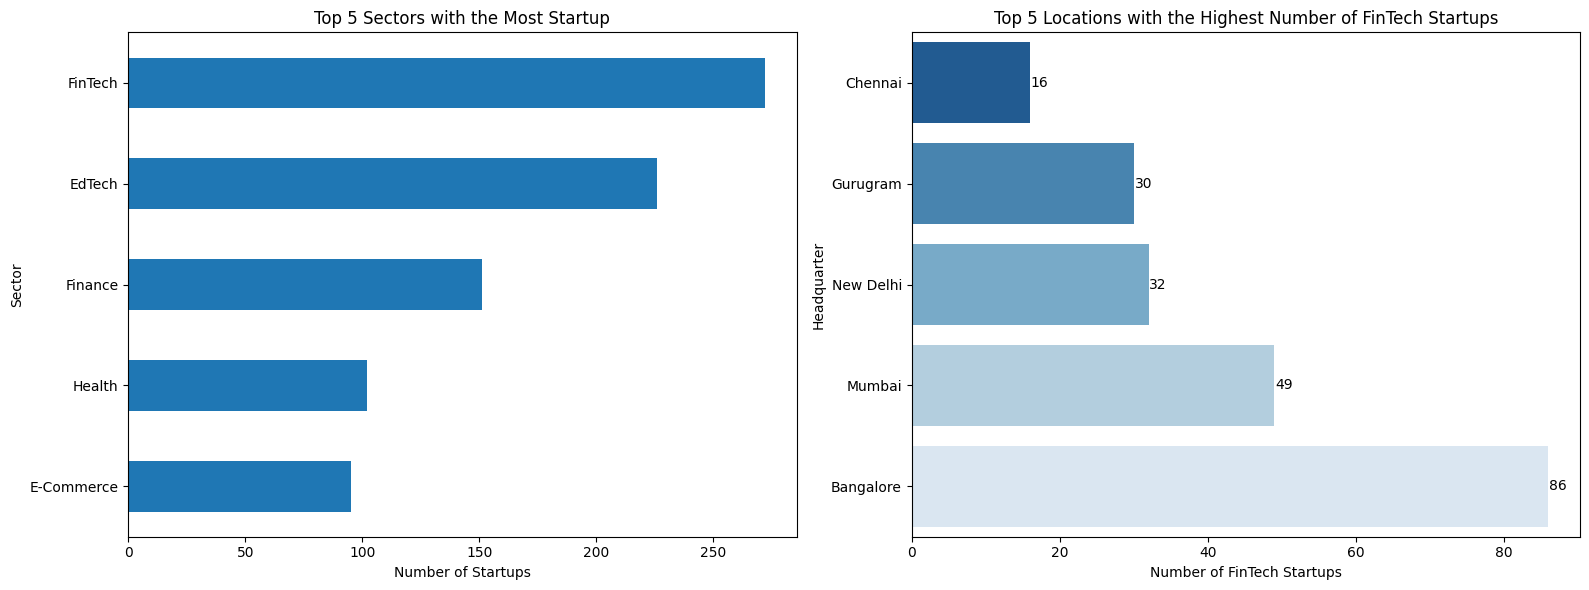

In [292]:
# Create subplots with 1 row and 2 columns
fig, axs = plt.subplots(1, 2, figsize=(16, 6))

# Plot the top 5 sectors with the most startups
Top_five_sectors = df['Sector'].value_counts().head(5)
Top_five_sectors.sort_values().plot(kind='barh', ax=axs[0])
axs[0].set_title('Top 5 Sectors with the Most Startup')
axs[0].set_xlabel('Number of Startups')
axs[0].set_ylabel('Sector')

# Filter data to include only startups in the FinTech sector
fintech_data = df[df['Sector'] == 'FinTech']

# Group data by location (city) and count the number of FinTech startups in each location
fintech_startup_count_per_location = fintech_data['Headquarter'].value_counts()

# Select the top 5 locations with the highest number of FinTech startups
top_5_locations = fintech_startup_count_per_location.head(5)

# Plotting the top 5 locations with the highest number of FinTech startups
sns.barplot(x=top_5_locations.values, y=top_5_locations.index, palette='Blues', ax=axs[1])

# Annotate the bars with count numbers
for i, count in enumerate(top_5_locations.values):
    axs[1].text(count + 0.1, i, str(count), ha='left', va='center')

axs[1].set_title('Top 5 Locations with the Highest Number of FinTech Startups')
axs[1].set_xlabel('Number of FinTech Startups')
axs[1].set_ylabel('Headquarter')
axs[1].invert_yaxis()  # Invert y-axis to display the highest count at the top

plt.tight_layout()
plt.show()


Observation

The findings reveal that the top booming sectors within the Indian startup ecosystem are FinTech, EdTech, Finance, E-Commerce, and SaaS, with FinTech leading the pack. Additionally, Bangalore emerges as the industrial hub in India, boasting the highest number of FinTech startups among the top cities, followed by Mumbai, New Delhi,Gurugram and Chennai.
The dominance of FinTech reflects the growing importance of digital financial services, while EdTech's prominence indicates significant demand for technology-driven educational solutions.

4. *Determine the top investors within the startup ecosystem and identify the proportion of investment by the first 3 investors that have funded different sectors from 2018 - 2021* 

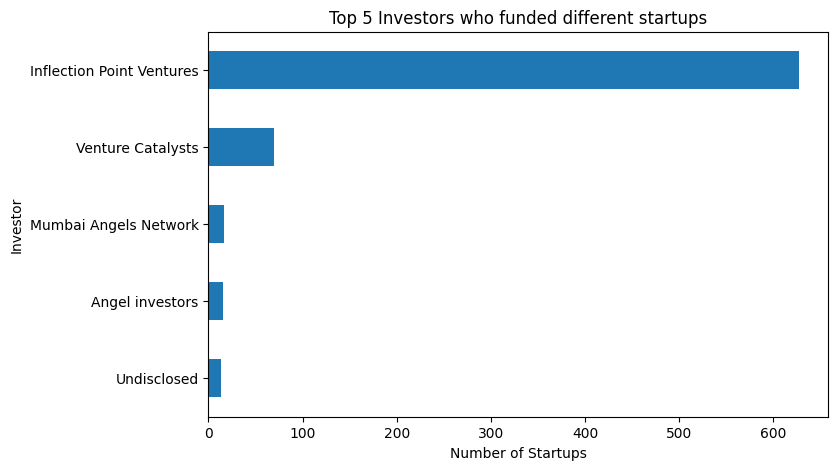

In [293]:
Top_10_investors_ = df['Investor'].value_counts().head(5)

# plot a bar chart to show the top 5 investors with the most number of startups
plt.figure(figsize=(8, 5))
Top_10_investors_.sort_values().plot(kind='barh')
plt.title('Top 5 Investors who funded different startups')
plt.xlabel('Number of Startups')
plt.ylabel('Investor');

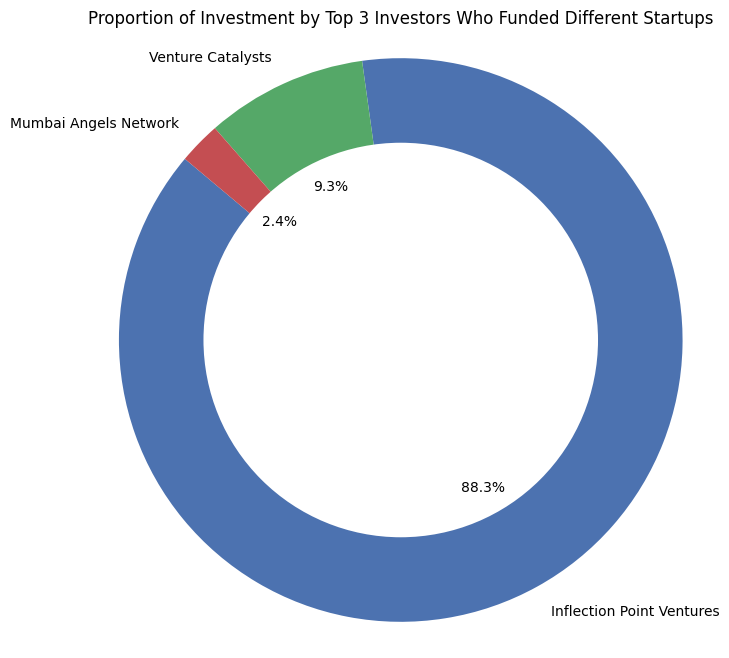

In [294]:
# Group data by investor and count the number of unique startups funded by each investor
investor_unique_startups = df.groupby('Investor')['Company'].nunique()

# Select the top 3 investors who funded the most different startups
top_3_investors = investor_unique_startups.nlargest(3)

# Calculate the total number of unique startups funded by the top 3 investors
total_unique_startups_top_3 = top_3_investors.sum()

# Calculate the proportion of investment made by each of the top 3 investors
proportion_top_3 = top_3_investors / total_unique_startups_top_3

# Plotting
colors = ['#4c72b0', '#55a868', '#c44e52']  # Professional color palette
plt.figure(figsize=(8, 8))
plt.pie(proportion_top_3, labels=proportion_top_3.index, autopct='%1.1f%%', startangle=140, colors=colors)
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.title('Proportion of Investment by Top 3 Investors Who Funded Different Startups')
plt.axis('equal')
plt.show()

Observtion

The analysis identifies Inflection Point Ventures, Venture Catalysts, and Mumbai Angels Network as the top investors within the Indian startup ecosystem. These key players have funded multiple startups across diverse sectors from 2018 to 2021. Inflection Point Ventures stands out with the highest proportion of investment, followed by Venture Catalysts and Mumbai Angels Network. Their diverse investment portfolios reflect a strategic approach to spreading risk and capitalizing on opportunities across various sectors, contributing to the growth and innovation of the startup ecosystem

5. *Explore which stages of startups (e.g., Seed, Series A, Series B) are receiving the majority of investments. What are the predominant stages funded, and which cities are the identified stages of business situated.*

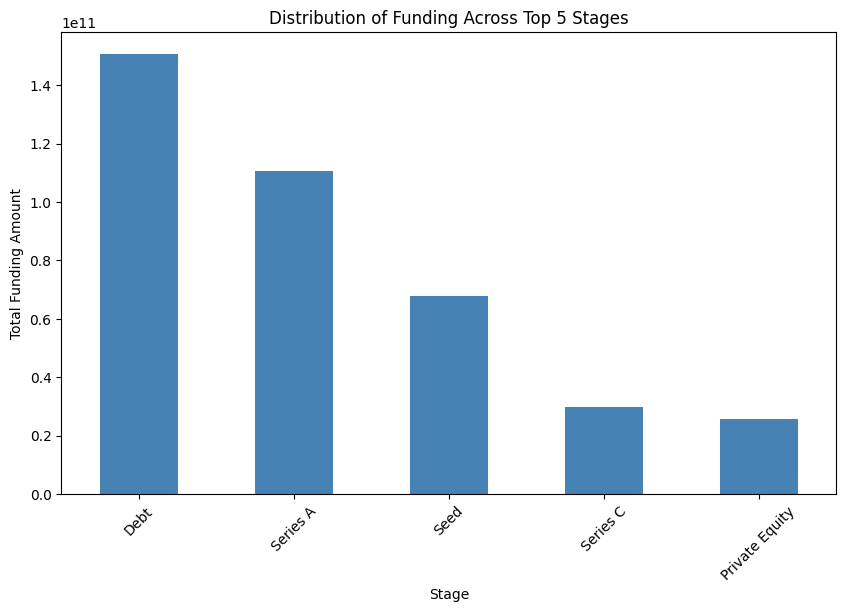

In [295]:
# Group data by stage and calculate the sum of funding amount for each stage
stage_funding = df.groupby('Stage')['Amount'].sum()

# Select the top 5 stages with the highest total funding amounts
top_5_stages = stage_funding.nlargest(5)

# Plotting
plt.figure(figsize=(10, 6))
top_5_stages.plot(kind='bar', color='steelblue')
plt.title('Distribution of Funding Across Top 5 Stages')
plt.xlabel('Stage')
plt.ylabel('Total Funding Amount')
plt.xticks(rotation=45)
plt.show()

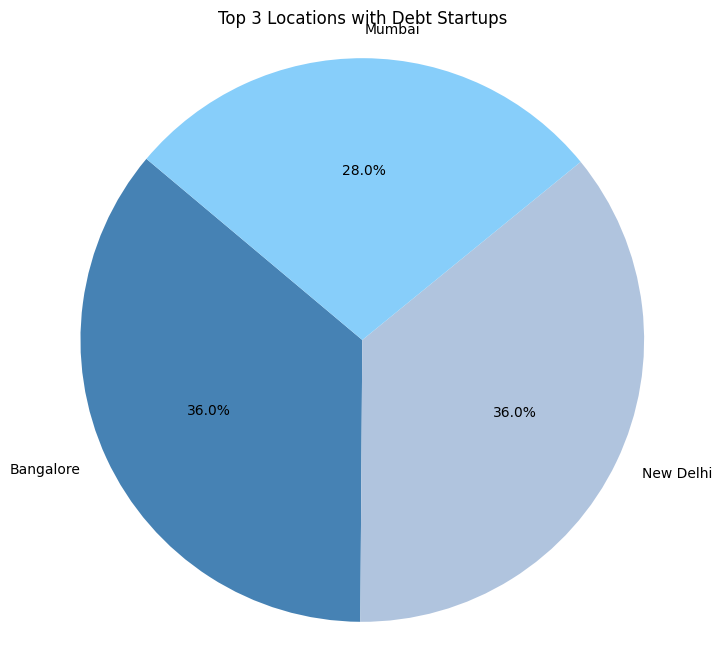

In [296]:
# Filter data for startups at the Series B stage
Debt_startups = df[df['Stage'] == 'Debt']

# Count the number of Series B startups in each location
Debt_startup_count_per_location = Debt_startups['Headquarter'].value_counts().head(3)

# Plotting
plt.figure(figsize=(8, 8))
plt.pie(Debt_startup_count_per_location, labels=Debt_startup_count_per_location.index, autopct='%1.1f%%', startangle=140, colors=['steelblue', 'lightsteelblue', 'lightskyblue'])
plt.title('Top 3 Locations with Debt Startups')
plt.axis('equal')

plt.show()


Observation

The top investors in the Indian startup ecosystem have shown a preference for funding businesses at various stages, with a notable focus on Debt investments. Debt funding is favored due to reduced risk and significant growth potential, as startups at this stage have typically proven they need external help and are ready to scale. Bangalore and New Delhi emerges as the primary location for Debt startups, accounting for 36.0% of investments, followed by Mumbai at 28%.

**Recomedation**

Based on the observations on the Indian startup ecosystem, here are some informed recommendations for the team to consider to make informed decision:

1. **Stay Resilient and Adaptable:** The Indian startup ecosystem has shown resilience and potential for growth, even in the face of challenges like the economic uncertainty associated with the COVID-19 pandemic. The team should be prepared to navigate uncertainties and adapt strategies as needed.

2. **Focus on High-Growth Sectors:** The booming sectors within the Indian startup ecosystem, such as FinTech, EdTech, Finance, E-Commerce, and SaaS, present lucrative opportunities for investment and innovation. The team should consider these sectors to capitalize on the growing demand and investor interest.

3. **Location Strategy:** Bangalore emerges as the industrial hub in India, with a high concentration of startups, particularly in the FinTech sector. The team should consider establishing a presence in Bangalore to tap into the vibrant startup ecosystem and access talent, resources, and networking opportunities.

4. **Strategic Partnerships with Top Investors:** The team is encouraged to form strategic partnerships with top investors like Inflection Point Ventures, Venture Catalysts, and Mumbai Angels Network. These investors have a proven track record of funding successful startups across diverse sectors and can provide valuable insights, mentorship, funding opportunities.

5. **Focus on Debt Startups Investments:** Given the preference of top investors for Debt investments, the team should consider targeting startups at this stage for investment or partnership opportunities. Debt startups have typically proven their business model and are ready to scale, offering lower risk and significant growth potential.